In [1]:
import pandas as pd
import mne
import numpy as np 
import pandas as pd 
import os
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
_dfs_list = []
for csv_filename in tqdm(glob.glob('DDoSdata.csv')):
    _dfs_list.append(pd.read_csv(csv_filename))
df = pd.concat(_dfs_list)
df

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\Dedu\AppData\Local\Temp\ipykernel_15884\1696962799.py:3: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  _dfs_list.append(pd.read_csv(csv_filename))
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.93s/it]


,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1650261,1650261,1.528103e+09,e,1,tcp,1,192.168.100.150,54110,192.168.100.3,...,1.21662,40,38,1.56093,1.21662,328,308,1,DDoS,HTTP
1,1650262,1650262,1.528103e+09,e,1,tcp,1,192.168.100.150,54112,192.168.100.3,...,1.21662,40,38,1.56107,1.21662,328,308,1,DDoS,HTTP
2,1650263,1650263,1.528103e+09,e,1,tcp,1,192.168.100.150,54114,192.168.100.3,...,1.21662,40,38,1.24980,1.21662,328,308,1,DDoS,HTTP
3,1650264,1650264,1.528103e+09,e,1,tcp,1,192.168.100.150,54116,192.168.100.3,...,1.21662,40,38,1.24986,1.21662,328,308,1,DDoS,HTTP
4,1650265,1650265,1.528103e+09,e,1,tcp,1,192.168.100.150,54118,192.168.100.3,...,1.21662,40,38,1.24991,1.21662,328,308,1,DDoS,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927096,3577359,3577357,1.526352e+09,e,1,udp,3,192.168.100.3,36242,205.251.194.102,...,6.83201,2,74,6.81487,9.49326,4,122,0,Normal,Normal
1927097,3577360,3577358,1.526352e+09,e,1,udp,3,192.168.100.3,63574,205.251.194.102,...,6.83201,2,74,6.84924,9.49326,4,122,0,Normal,Normal
1927098,3577361,3577359,1.526352e+09,e,1,udp,3,192.168.100.3,59485,205.251.194.154,...,7.19694,1,74,7.19694,9.49326,2,122,0,Normal,Normal
1927099,3577362,3577360,1.526352e+09,e,1,udp,3,192.168.100.3,20844,192.31.80.30,...,7.12689,2,74,7.12398,9.49326,4,122,0,Normal,Normal


In [3]:
df= df.drop('Unnamed: 0', axis=1)
df.head()

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1650261,1.528103e+09,e,1,tcp,1,192.168.100.150,54110,192.168.100.3,80,...,1.21662,40,38,1.56093,1.21662,328,308,1,DDoS,HTTP
1,1650262,1.528103e+09,e,1,tcp,1,192.168.100.150,54112,192.168.100.3,80,...,1.21662,40,38,1.56107,1.21662,328,308,1,DDoS,HTTP
2,1650263,1.528103e+09,e,1,tcp,1,192.168.100.150,54114,192.168.100.3,80,...,1.21662,40,38,1.24980,1.21662,328,308,1,DDoS,HTTP
3,1650264,1.528103e+09,e,1,tcp,1,192.168.100.150,54116,192.168.100.3,80,...,1.21662,40,38,1.24986,1.21662,328,308,1,DDoS,HTTP
4,1650265,1.528103e+09,e,1,tcp,1,192.168.100.150,54118,192.168.100.3,80,...,1.21662,40,38,1.24991,1.21662,328,308,1,DDoS,HTTP


In [4]:
df.describe()

,pkSeqID,stime,flgs_number,proto_number,pkts,bytes,state_number,ltime,seq,dur,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
count,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,...,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06,1.927101e+06
mean,2.613811e+06,1.528097e+09,1.442916e+00,1.984566e+00,7.913937e+00,1.126113e+03,3.043337e+00,1.528097e+09,1.232456e+05,1.484886e+01,...,7.340666e+02,1.337962e+00,1.806924e+00,9.988476e+01,8.194398e+01,8.421088e-01,1.418524e+00,6.771640e+02,5.741962e+02,9.997525e-01
std,5.563063e+05,2.756896e+04,6.024243e-01,9.998889e-01,1.591975e+02,1.548951e+05,1.191149e+00,2.756568e+04,7.380114e+04,1.238456e+01,...,8.333697e+02,8.717285e+01,2.242319e+02,2.628704e+00,2.422842e+01,6.318281e+01,6.320693e+01,5.036687e+02,4.717024e+02,1.573089e-02
min,1.650261e+06,1.526344e+09,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,1.000000e+00,1.526344e+09,1.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.132036e+06,1.528096e+09,1.000000e+00,1.000000e+00,5.000000e+00,4.200000e+02,3.000000e+00,1.528096e+09,6.004700e+04,1.212153e+01,...,5.000000e+02,3.594890e-01,3.703380e-01,1.000000e+02,6.800000e+01,3.502690e-01,3.703120e-01,3.650000e+02,2.680000e+02,1.000000e+00
50%,2.613811e+06,1.528096e+09,1.000000e+00,1.000000e+00,7.000000e+00,6.160000e+02,3.000000e+00,1.528096e+09,1.202690e+05,1.368344e+01,...,6.820000e+02,5.410290e-01,5.497720e-01,1.000000e+02,9.700000e+01,5.437660e-01,5.496870e-01,6.270000e+02,5.000000e+02,1.000000e+00
75%,3.095586e+06,1.528099e+09,2.000000e+00,3.000000e+00,1.000000e+01,7.800000e+02,4.000000e+00,1.528099e+09,1.831610e+05,1.454814e+01,...,9.520000e+02,7.588950e-01,7.534680e-01,1.000000e+02,1.000000e+02,7.286400e-01,7.534480e-01,9.480000e+02,7.840000e+02,1.000000e+00
max,3.577361e+06,1.528103e+09,7.000000e+00,5.000000e+00,7.005700e+04,7.183334e+07,8.000000e+00,1.528103e+09,2.621680e+05,1.940859e+03,...,2.444250e+05,8.695650e+04,1.818180e+05,1.000000e+02,1.000000e+02,8.695650e+04,8.695650e+04,1.125440e+05,1.179390e+05,1.000000e+00


In [5]:
for feature in df.columns:
    print("featurename-",feature, "-datatype-",df[feature].dtypes,"-length -",len(df[feature].unique()))

featurename- pkSeqID -datatype- int64 -length - 1927101
featurename- stime -datatype- float64 -length - 187076
featurename- flgs -datatype- object -length - 7
featurename- flgs_number -datatype- int64 -length - 7
featurename- proto -datatype- object -length - 5
featurename- proto_number -datatype- int64 -length - 5
featurename- saddr -datatype- object -length - 21
featurename- sport -datatype- object -length - 128077
featurename- daddr -datatype- object -length - 83
featurename- dport -datatype- object -length - 3429
featurename- pkts -datatype- int64 -length - 75
featurename- bytes -datatype- int64 -length - 626
featurename- state -datatype- object -length - 8
featurename- state_number -datatype- int64 -length - 8
featurename- ltime -datatype- float64 -length - 182932
featurename- seq -datatype- int64 -length - 262168
featurename- dur -datatype- float64 -length - 368933
featurename- mean -datatype- float64 -length - 300545
featurename- stddev -datatype- float64 -length - 277478
featur

In [6]:
numerical_feature= [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if (df[feature].dtypes == 'int64')]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 37
Discrete feature Count 22
Continuous feature Count 15
Categorical feature Count 9


In [7]:
print("Numerical features:",numerical_feature)
print(" ")
print("discrete_features:",discrete_feature)
print(" ")
print("continuous_features:",continuous_feature)
print(" ")
print("categorical_features:",categorical_feature)

Numerical features: ['pkSeqID', 'stime', 'flgs_number', 'proto_number', 'pkts', 'bytes', 'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP', 'attack']
 
discrete_features: ['pkSeqID', 'flgs_number', 'proto_number', 'pkts', 'bytes', 'state_number', 'seq', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP', 'attack']
 
continuous_features: ['stime', 'ltime', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'rate', 'srate', 'drate', 'AR_P

In [8]:
#check for null values
df.isnull().sum()*100/len(df)

pkSeqID                             0.0
stime                               0.0
flgs                                0.0
flgs_number                         0.0
proto                               0.0
proto_number                        0.0
saddr                               0.0
sport                               0.0
daddr                               0.0
dport                               0.0
pkts                                0.0
bytes                               0.0
state                               0.0
state_number                        0.0
ltime                               0.0
seq                                 0.0
dur                                 0.0
mean                                0.0
stddev                              0.0
sum                                 0.0
min                                 0.0
max                                 0.0
spkts                               0.0
dpkts                               0.0
sbytes                              0.0


C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dedu\anaconda3\lib\site-p

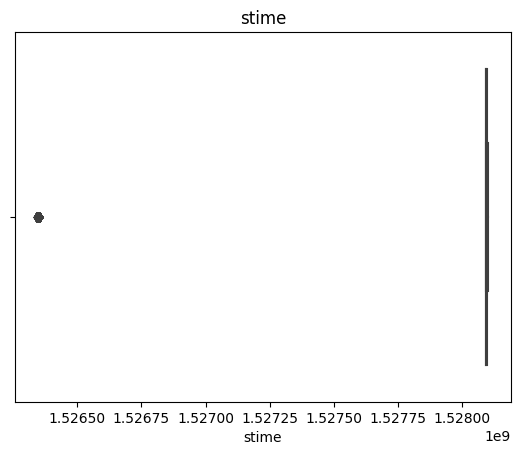

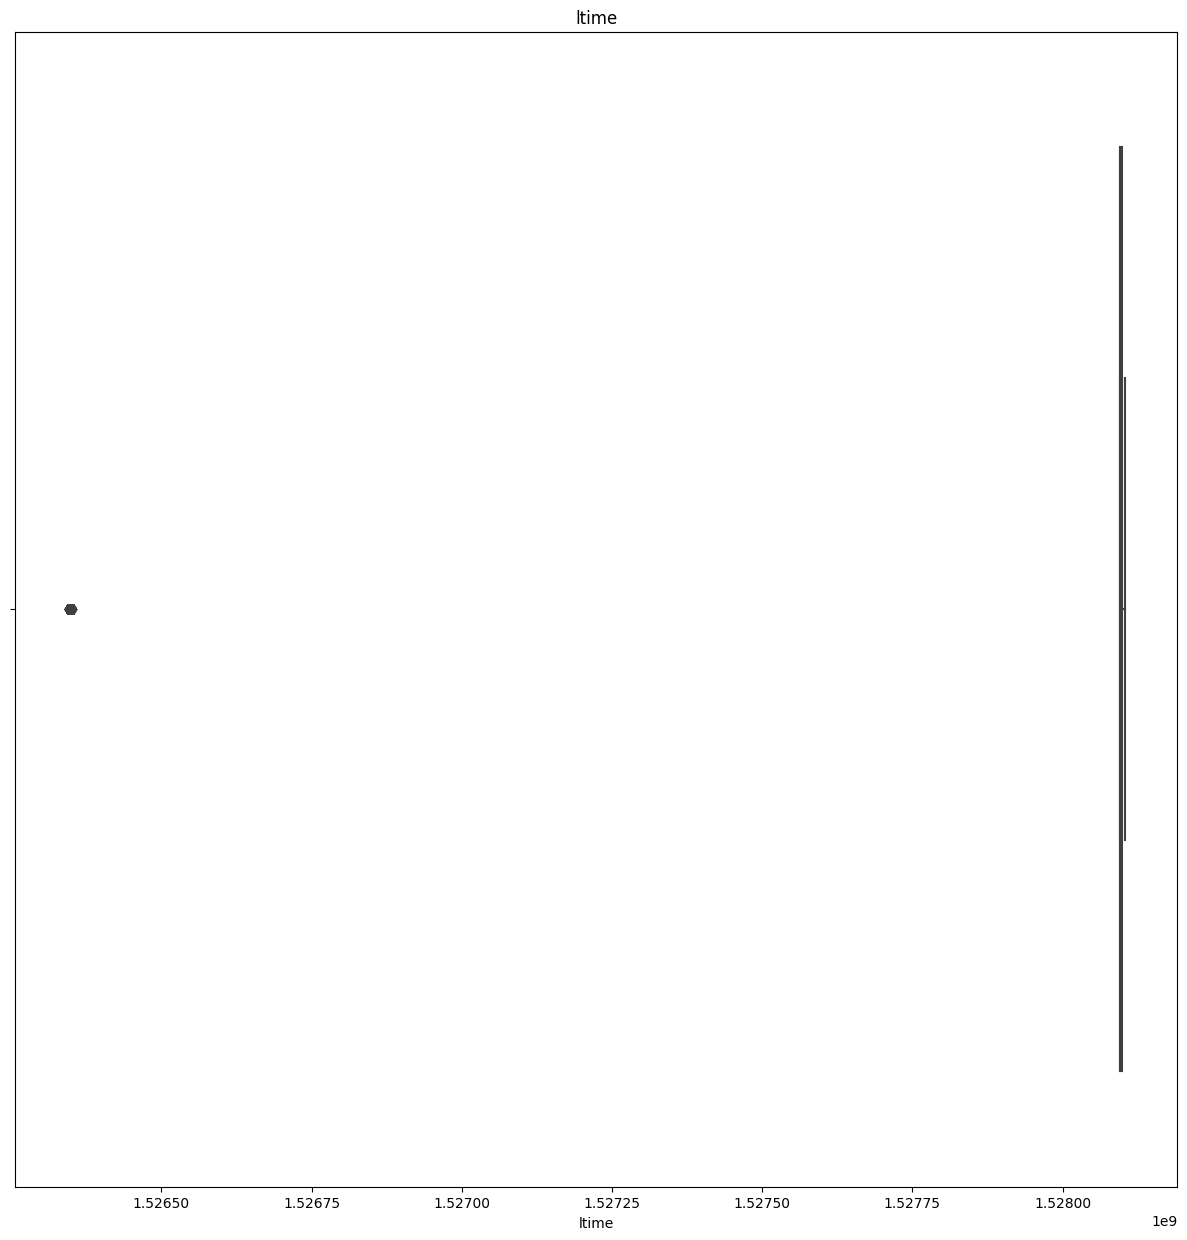

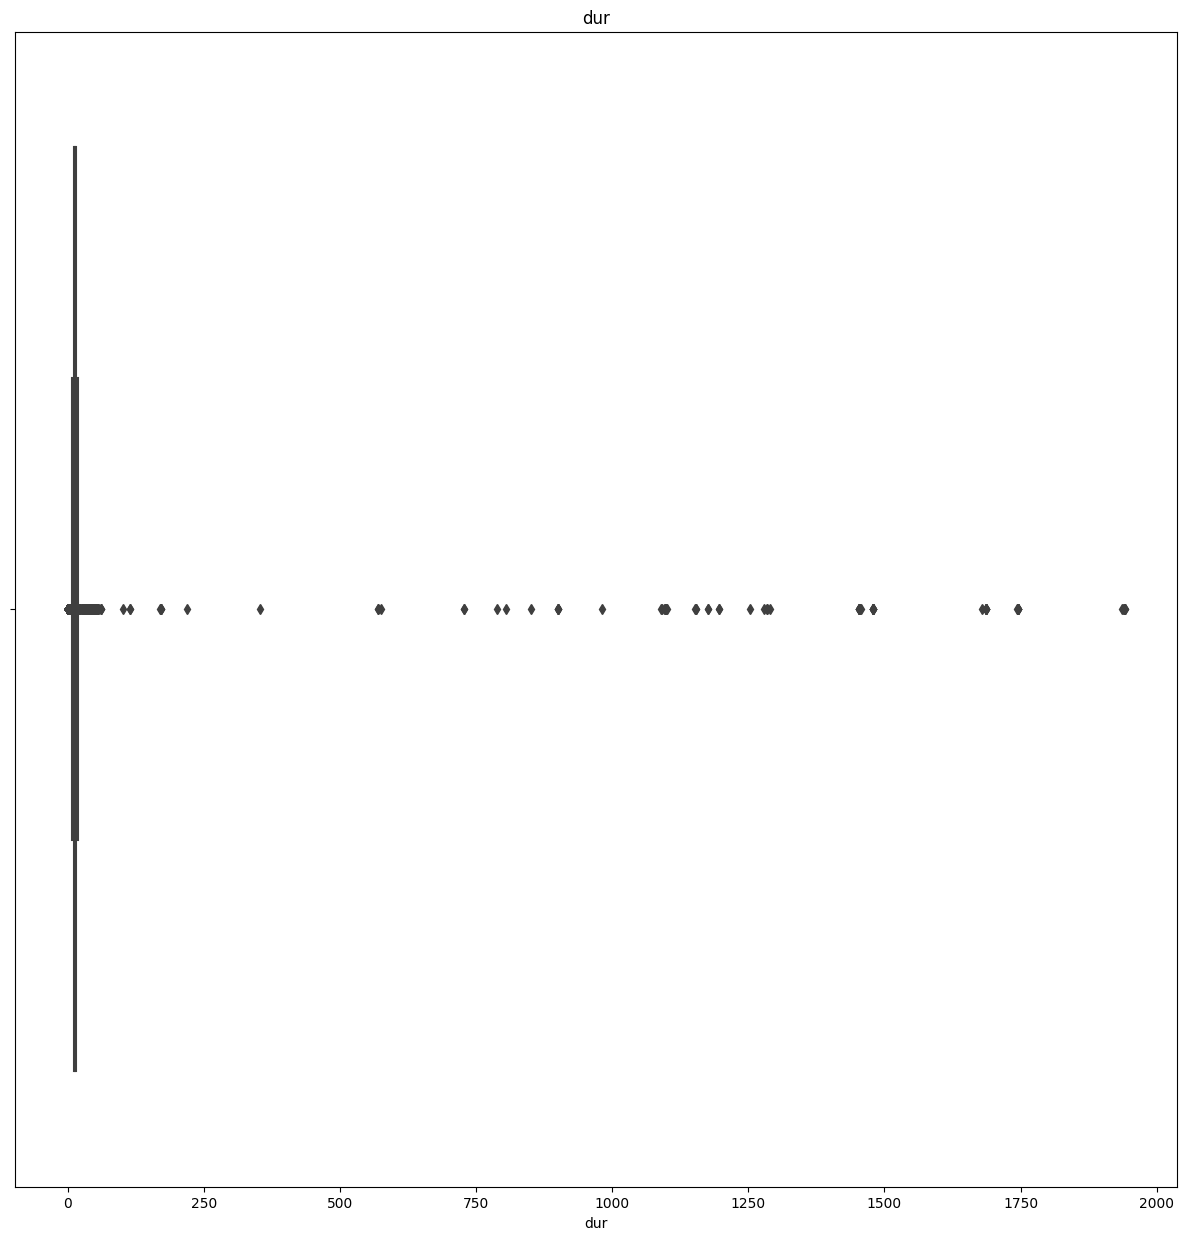

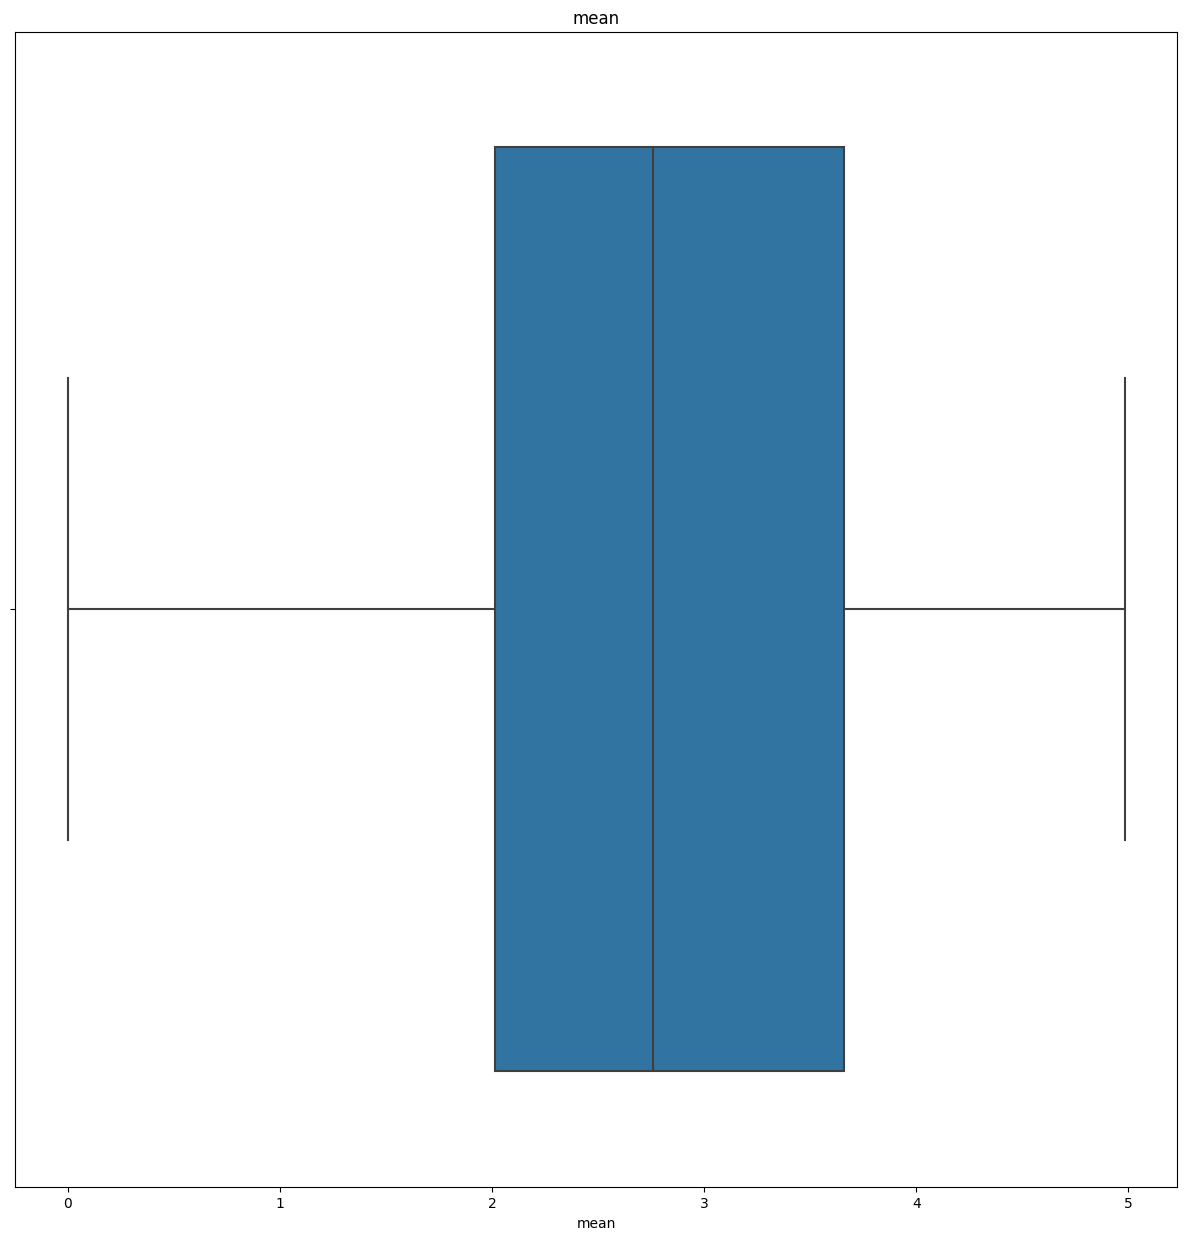

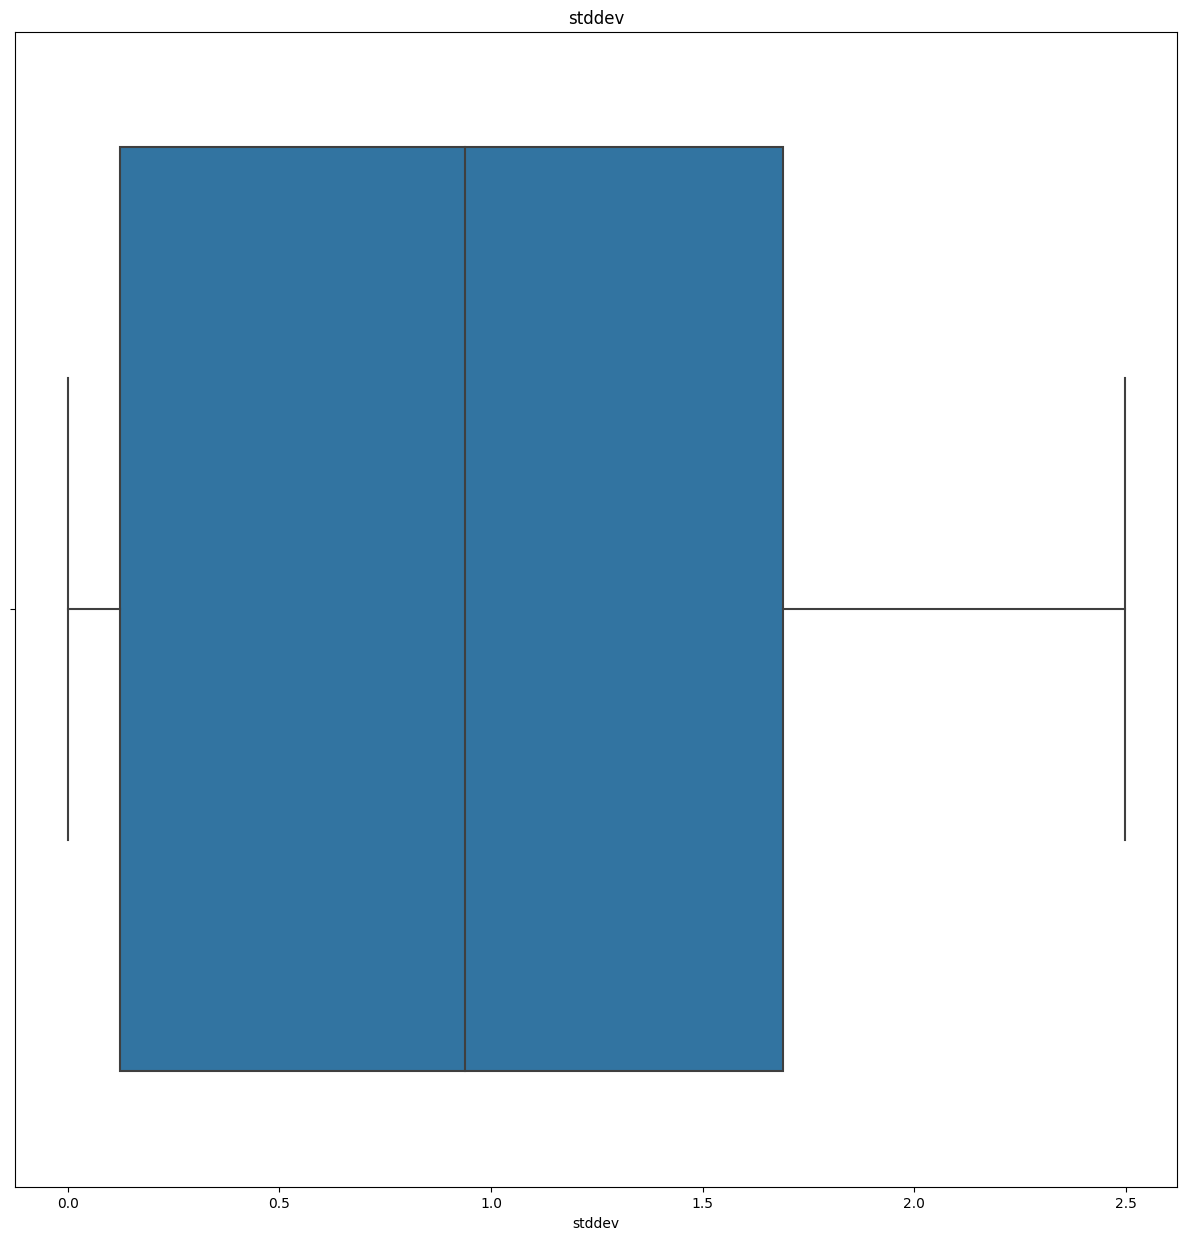

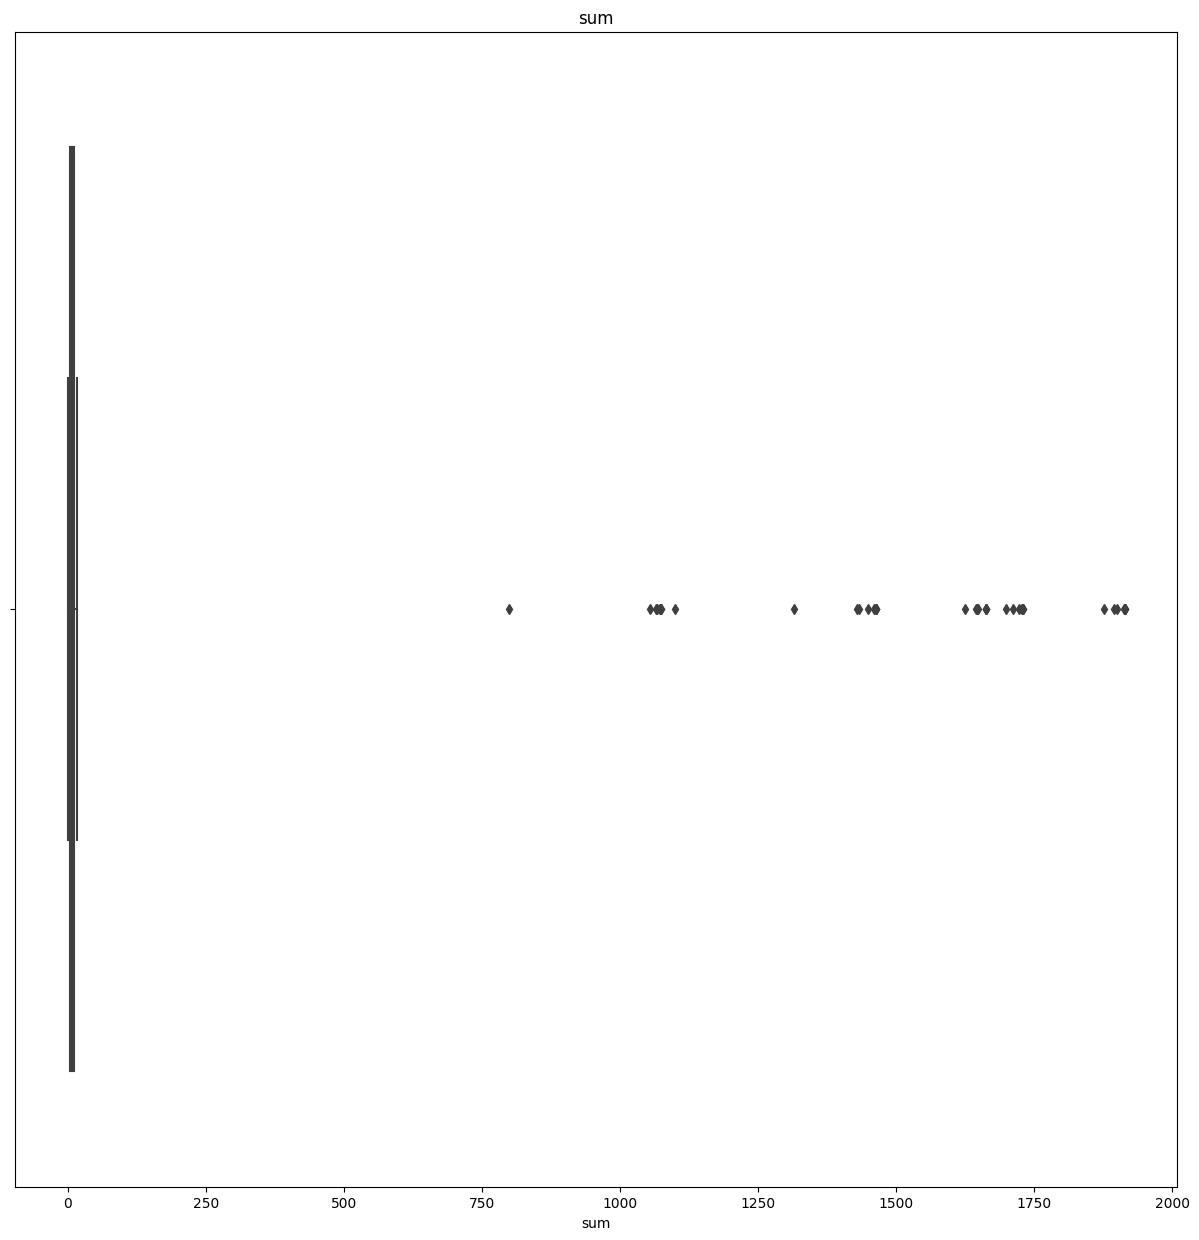

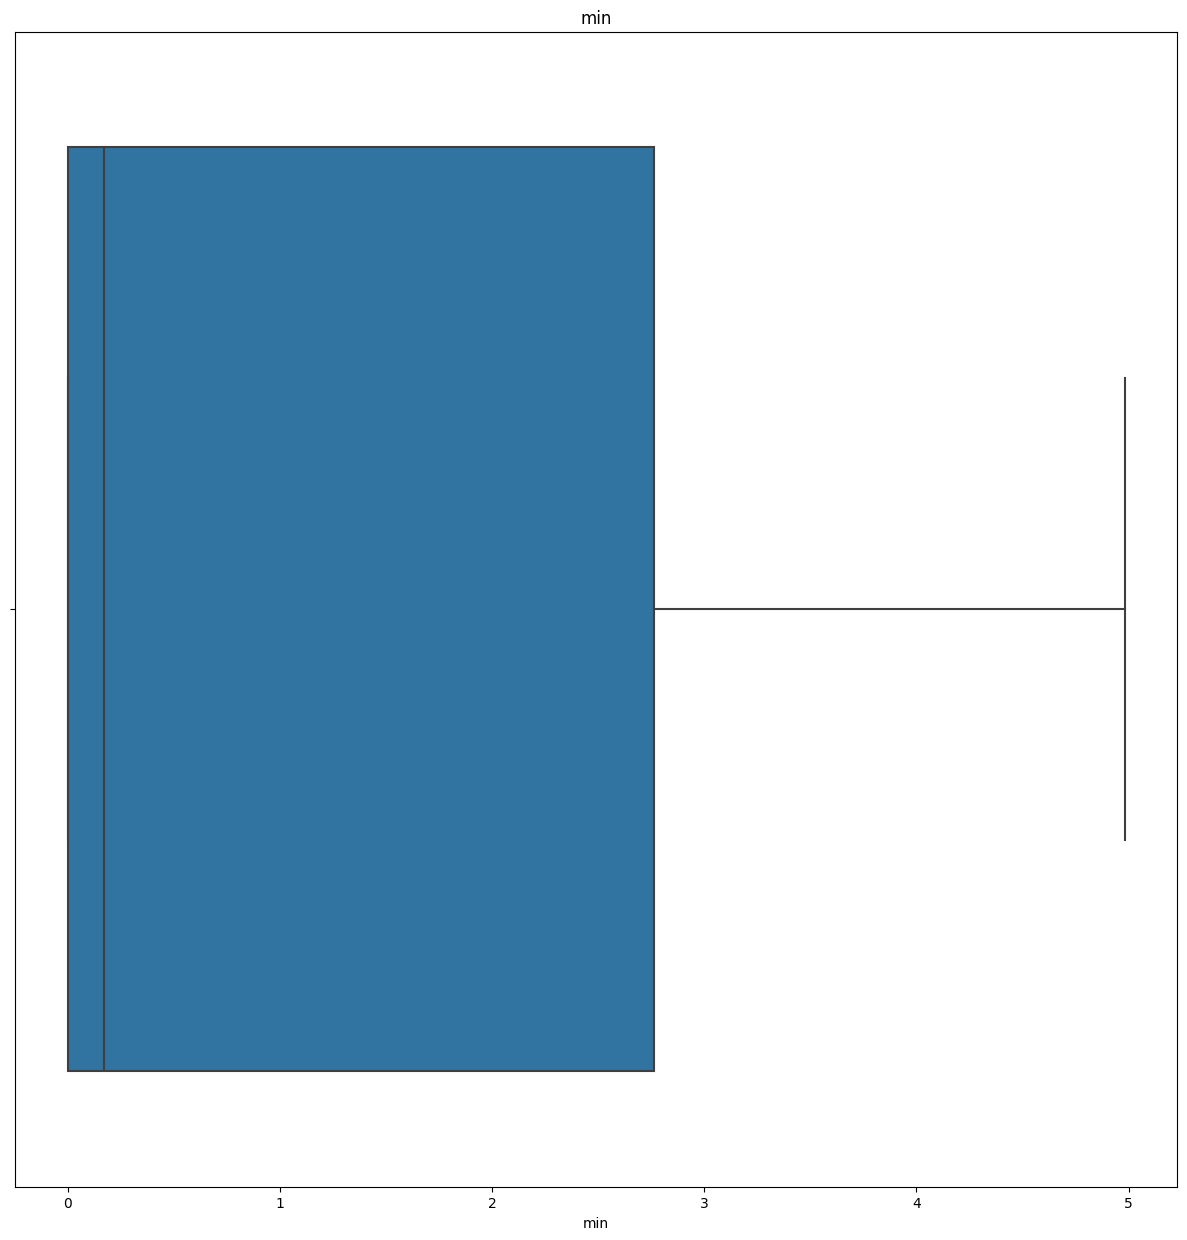

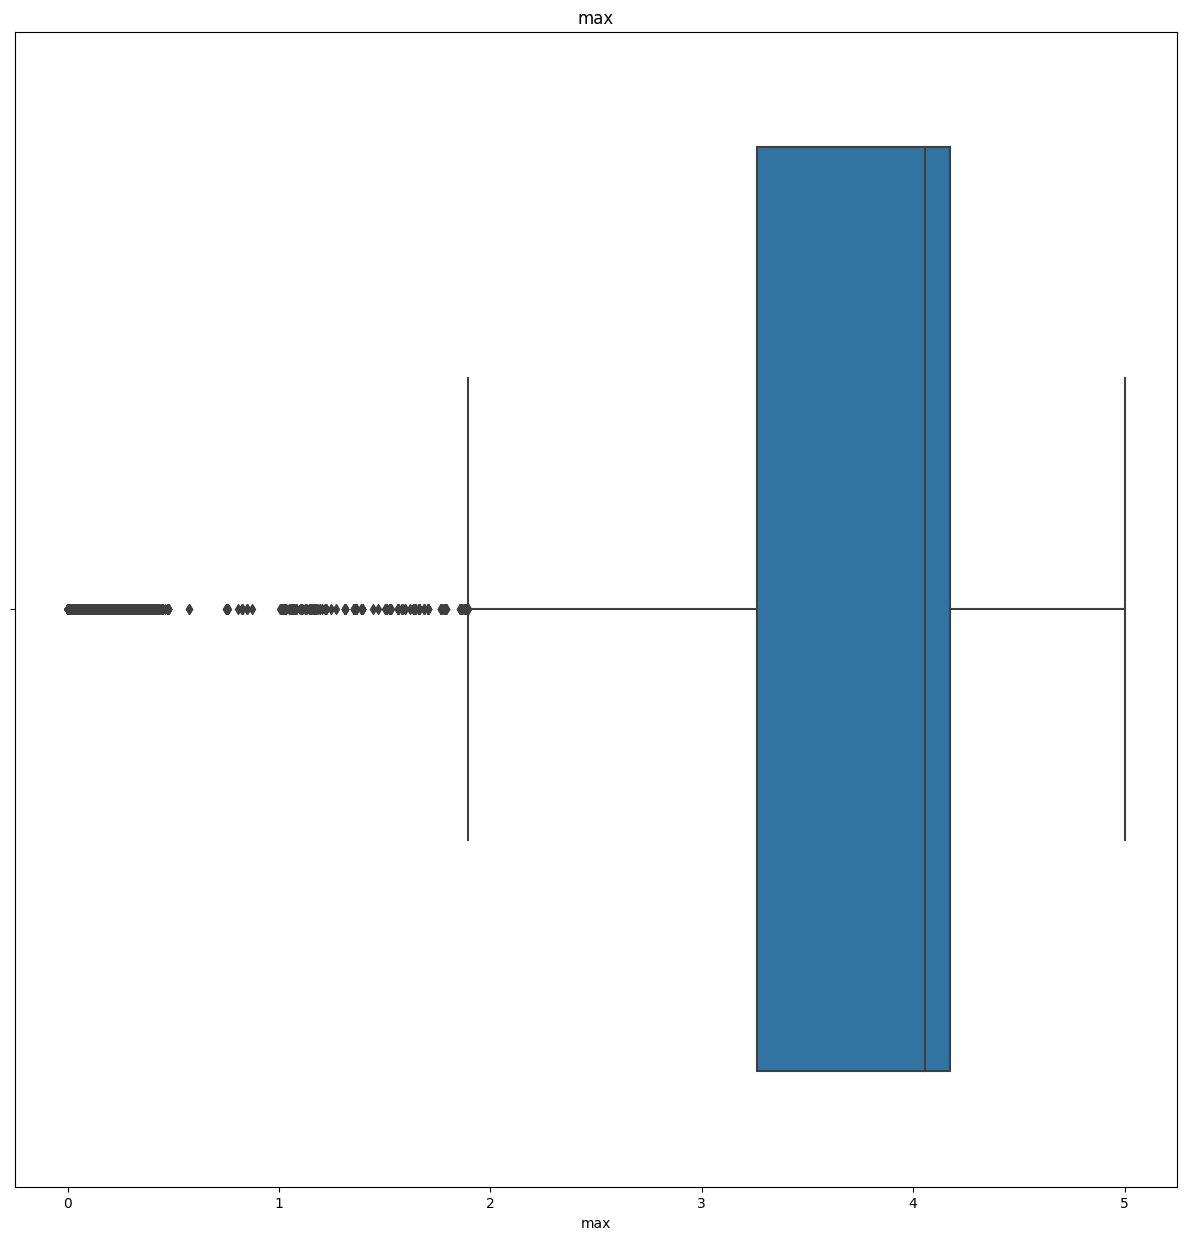

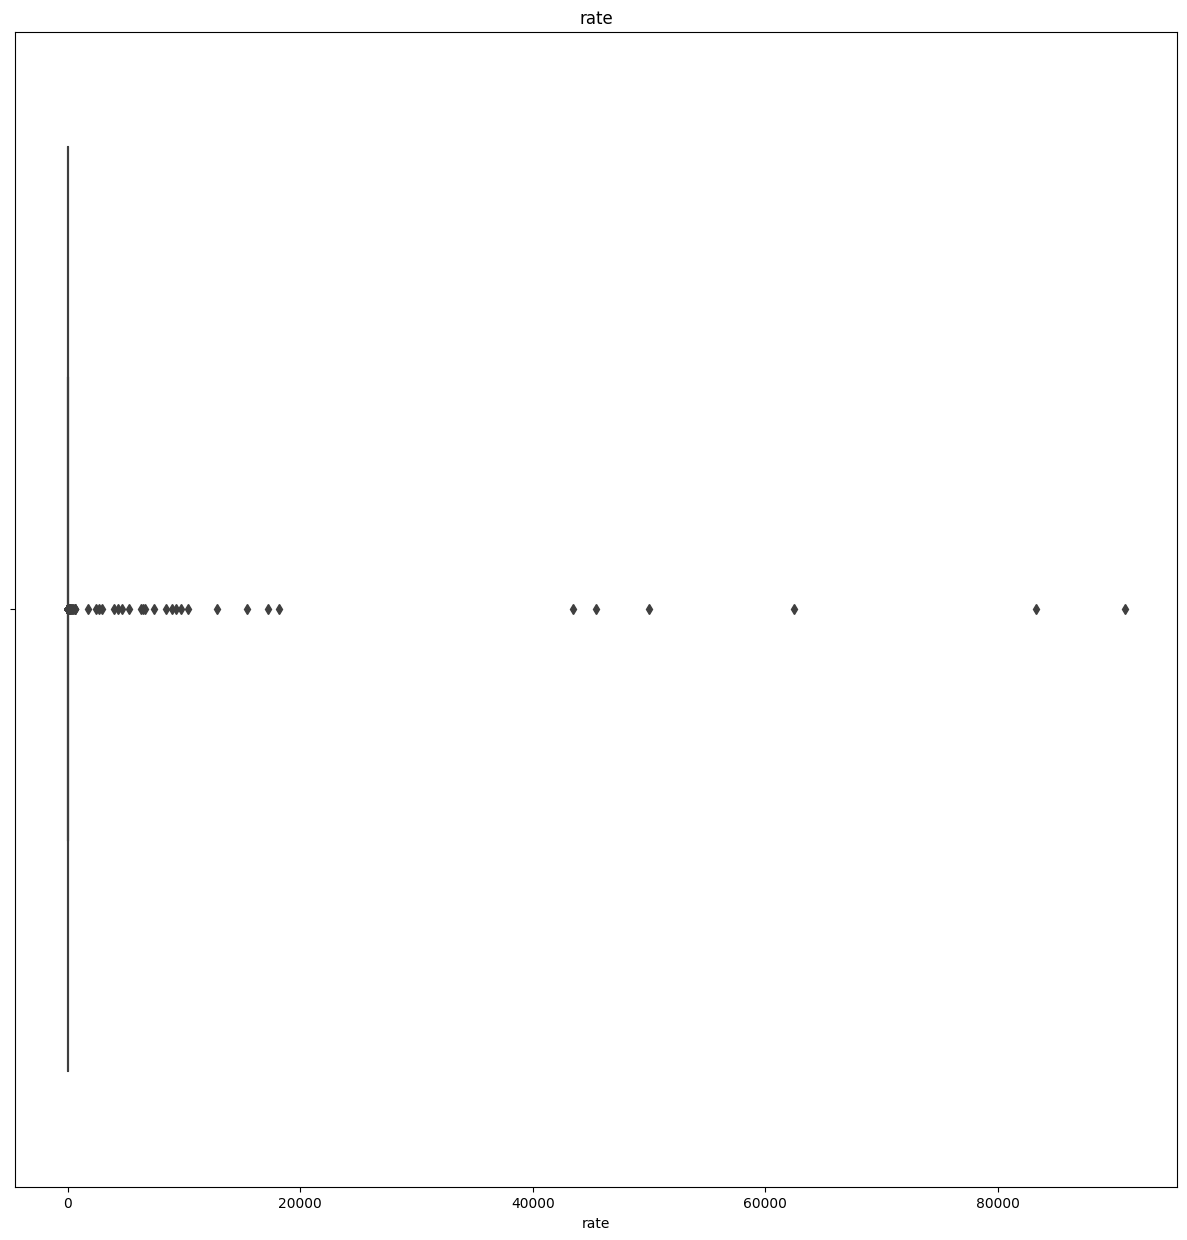

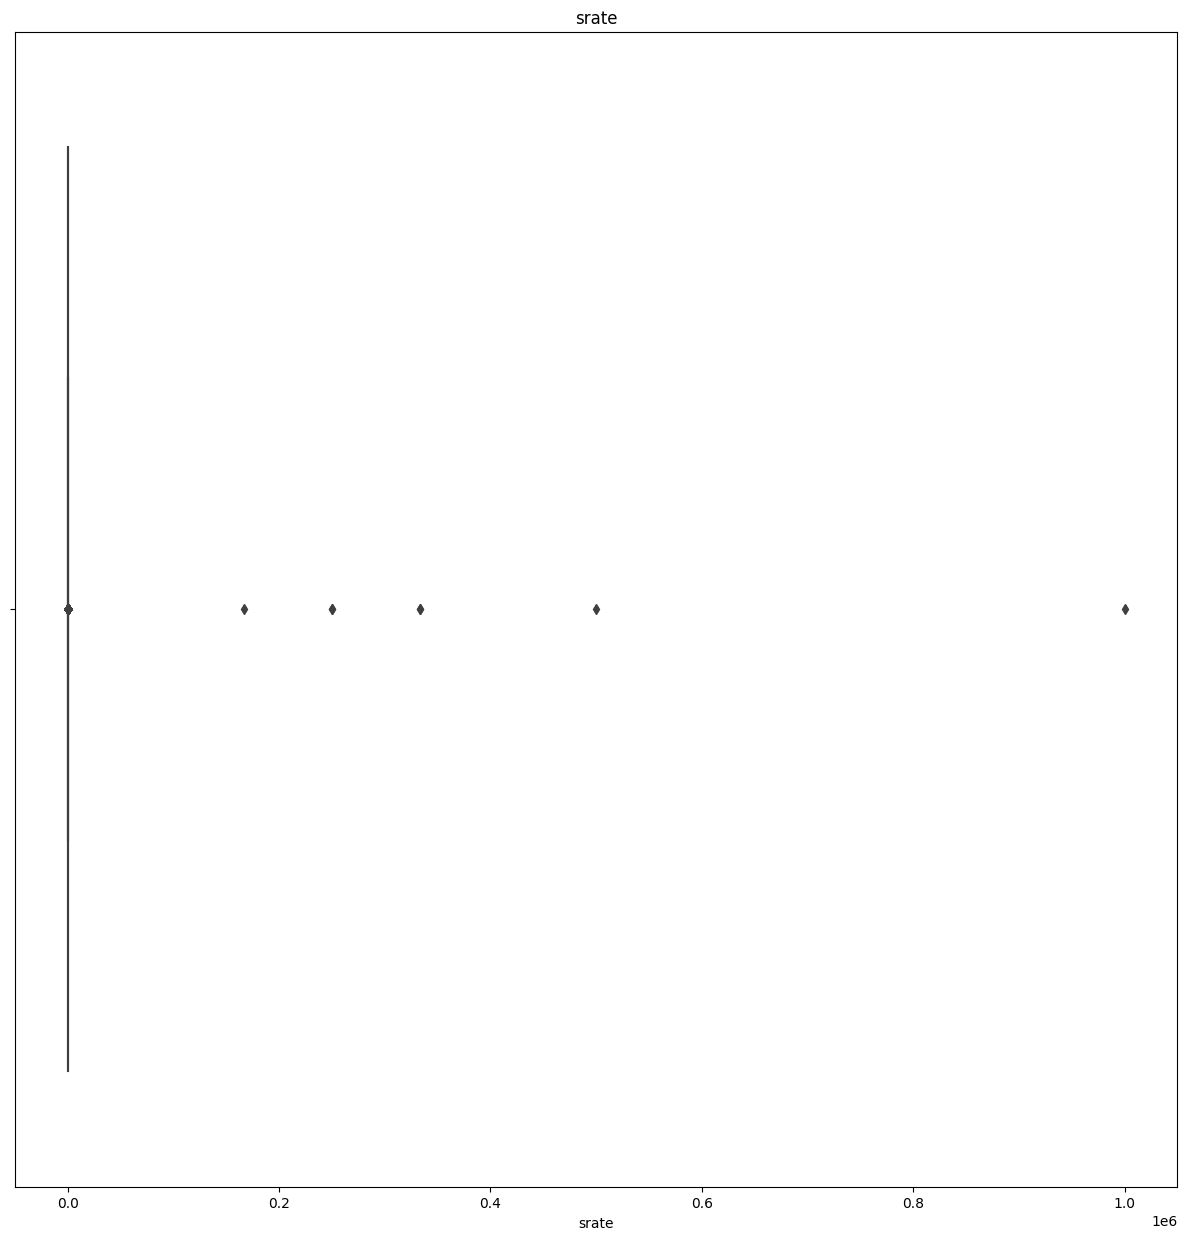

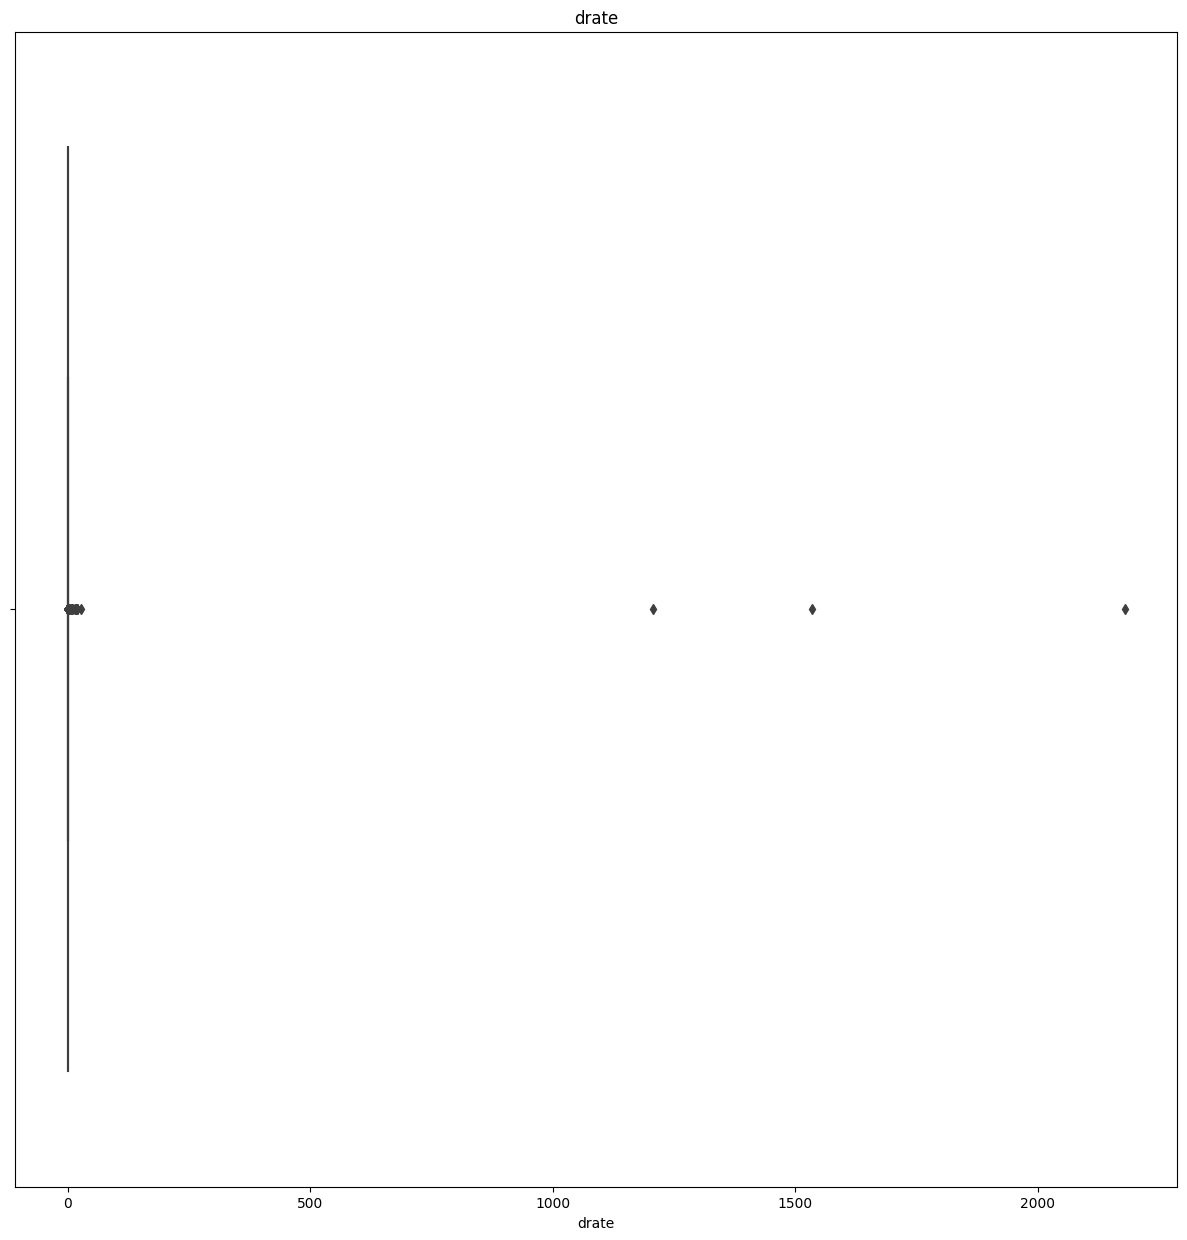

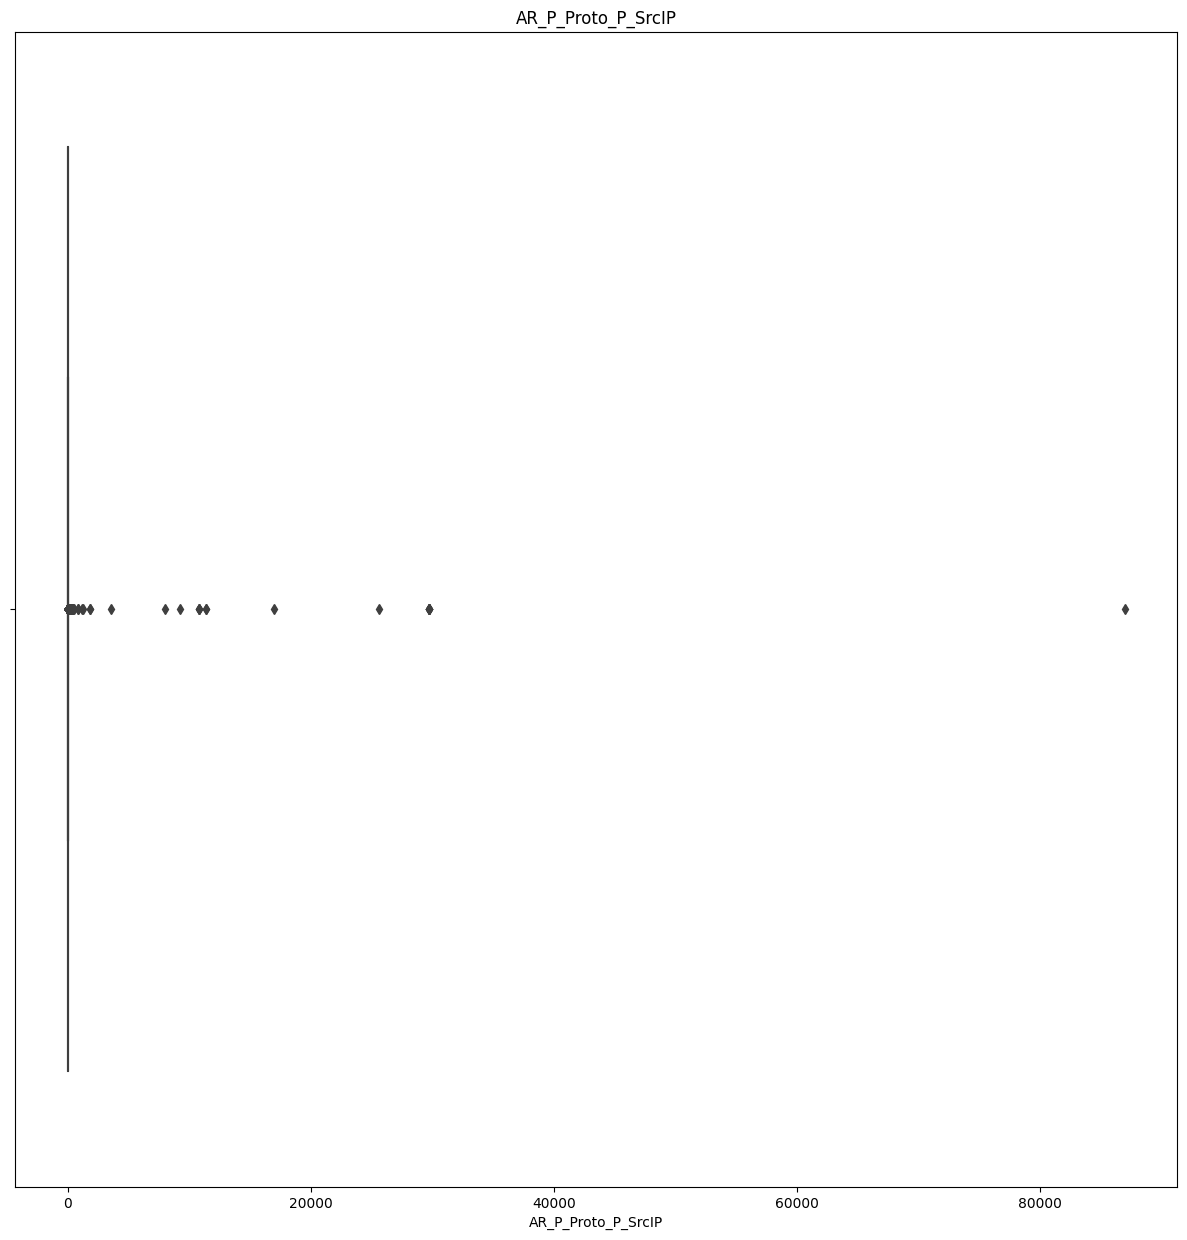

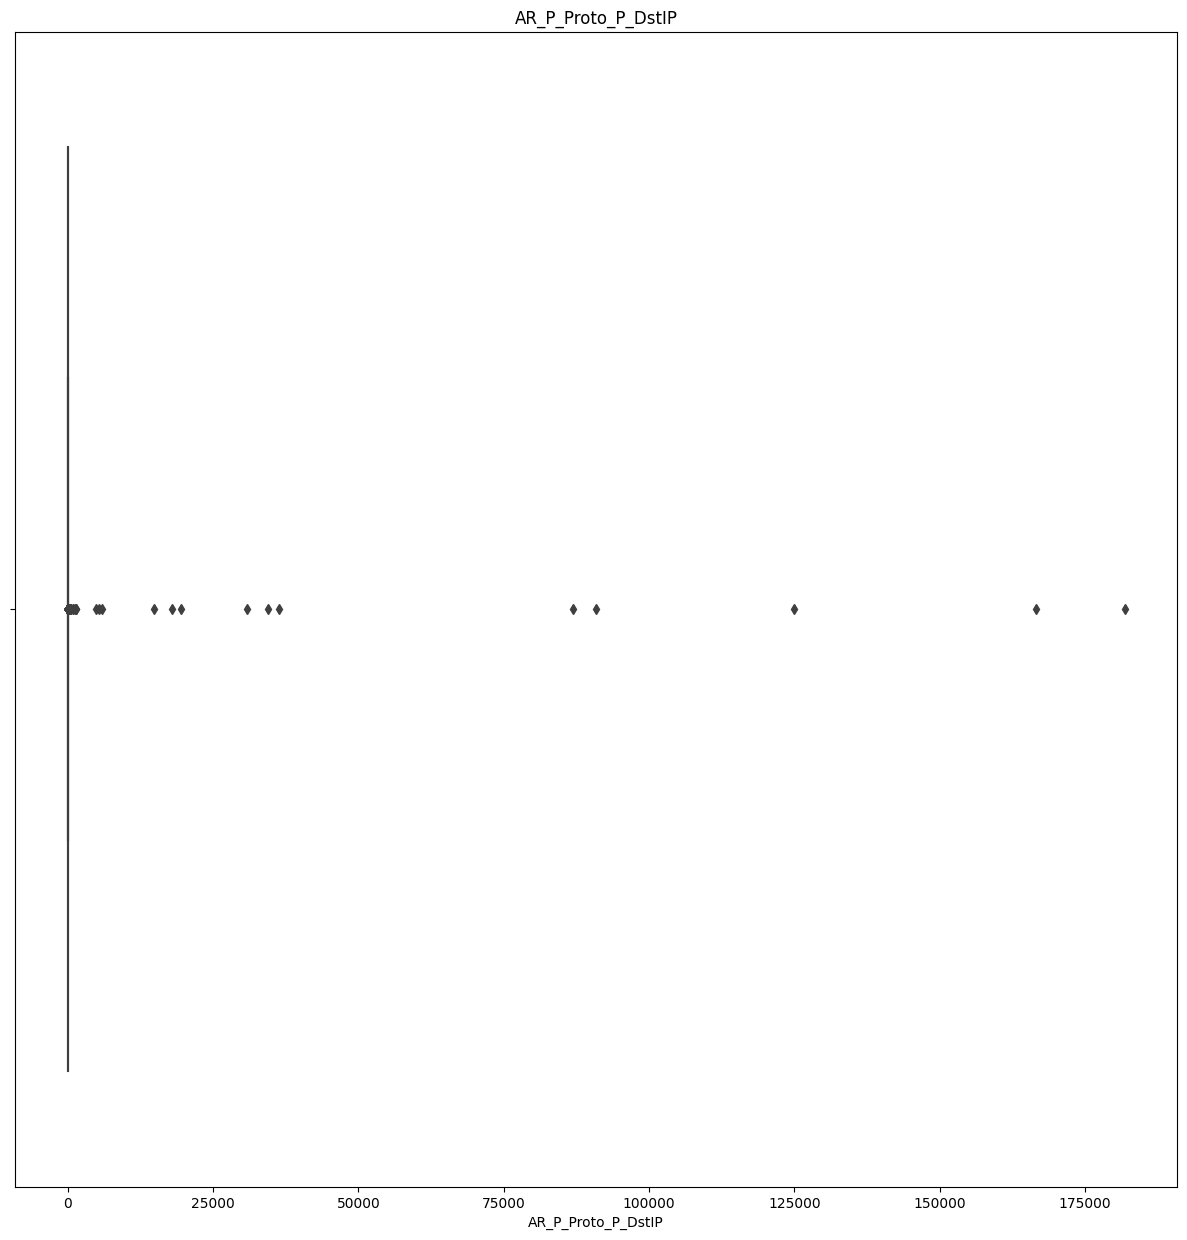

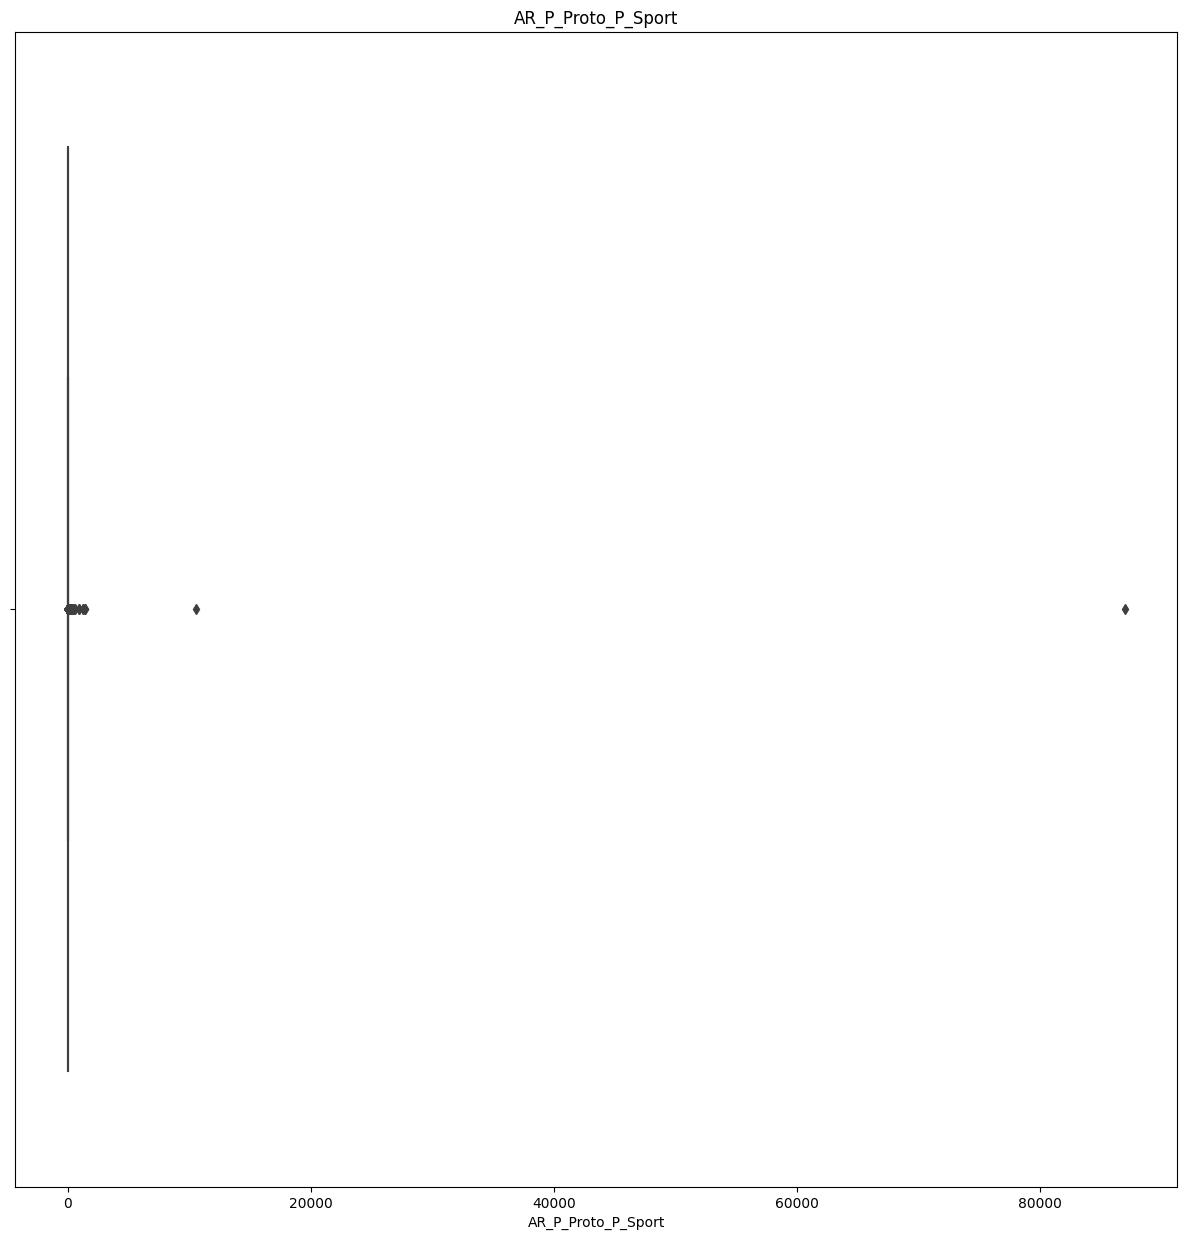

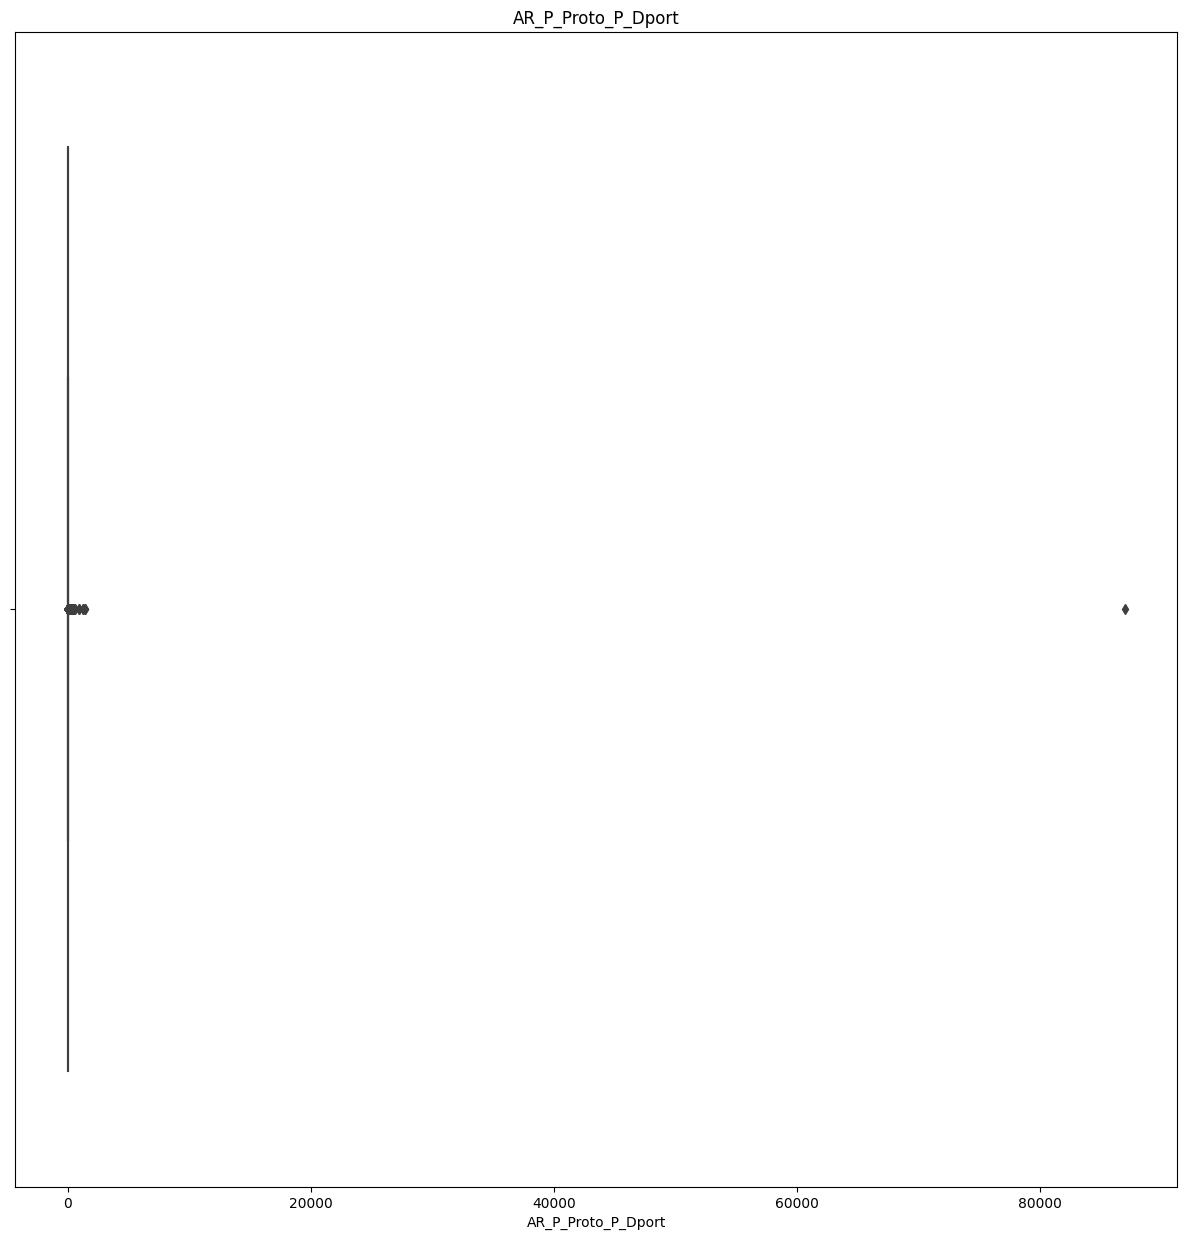

<Figure size 1500x1500 with 0 Axes>

In [9]:
#check for outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [10]:
#remove outliers
def removeoutlier(df,variable):
    IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    lower_bridge=df[variable].quantile(0.25)-(IQR*1.5)
    upper_bridge=df[variable].quantile(0.75)+(IQR*1.5)
    print(lower_bridge, upper_bridge)
    df.loc[df[variable]>=upper_bridge,variable]=upper_bridge
    df.loc[df[variable]<=lower_bridge,variable]=lower_bridge

In [11]:
for feature in continuous_feature:
    print(feature)
    removeoutlier(df,feature)


stime
1528090362.968655 1528104724.242455
ltime
1528090378.8234344 1528104736.0017953
dur
8.481611000000001 18.188050999999994
mean
-0.45019150000000074 6.1258765
stddev
-2.2278314999999997 4.0407725
sum
-4.449996500000002 19.503719500000003
min
-4.145118 6.908530000000001
max
1.8927640000000008 5.540283999999999
rate
-0.29879550000000005 1.2218165
srate
-0.32738 1.2118919999999997
drate
0.0 0.0
AR_P_Proto_P_SrcIP
-0.23962 1.358004
AR_P_Proto_P_DstIP
-0.20435700000000007 1.328163
AR_P_Proto_P_Sport
-0.2172874999999999 1.2961964999999998
AR_P_Proto_P_Dport
-0.20439200000000013 1.3281520000000002


C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dedu\anaconda3\lib\site-p

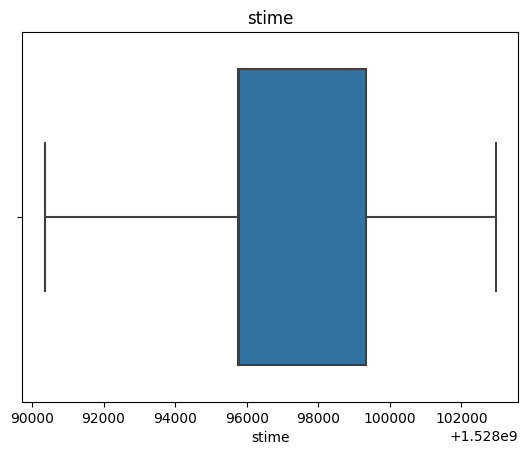

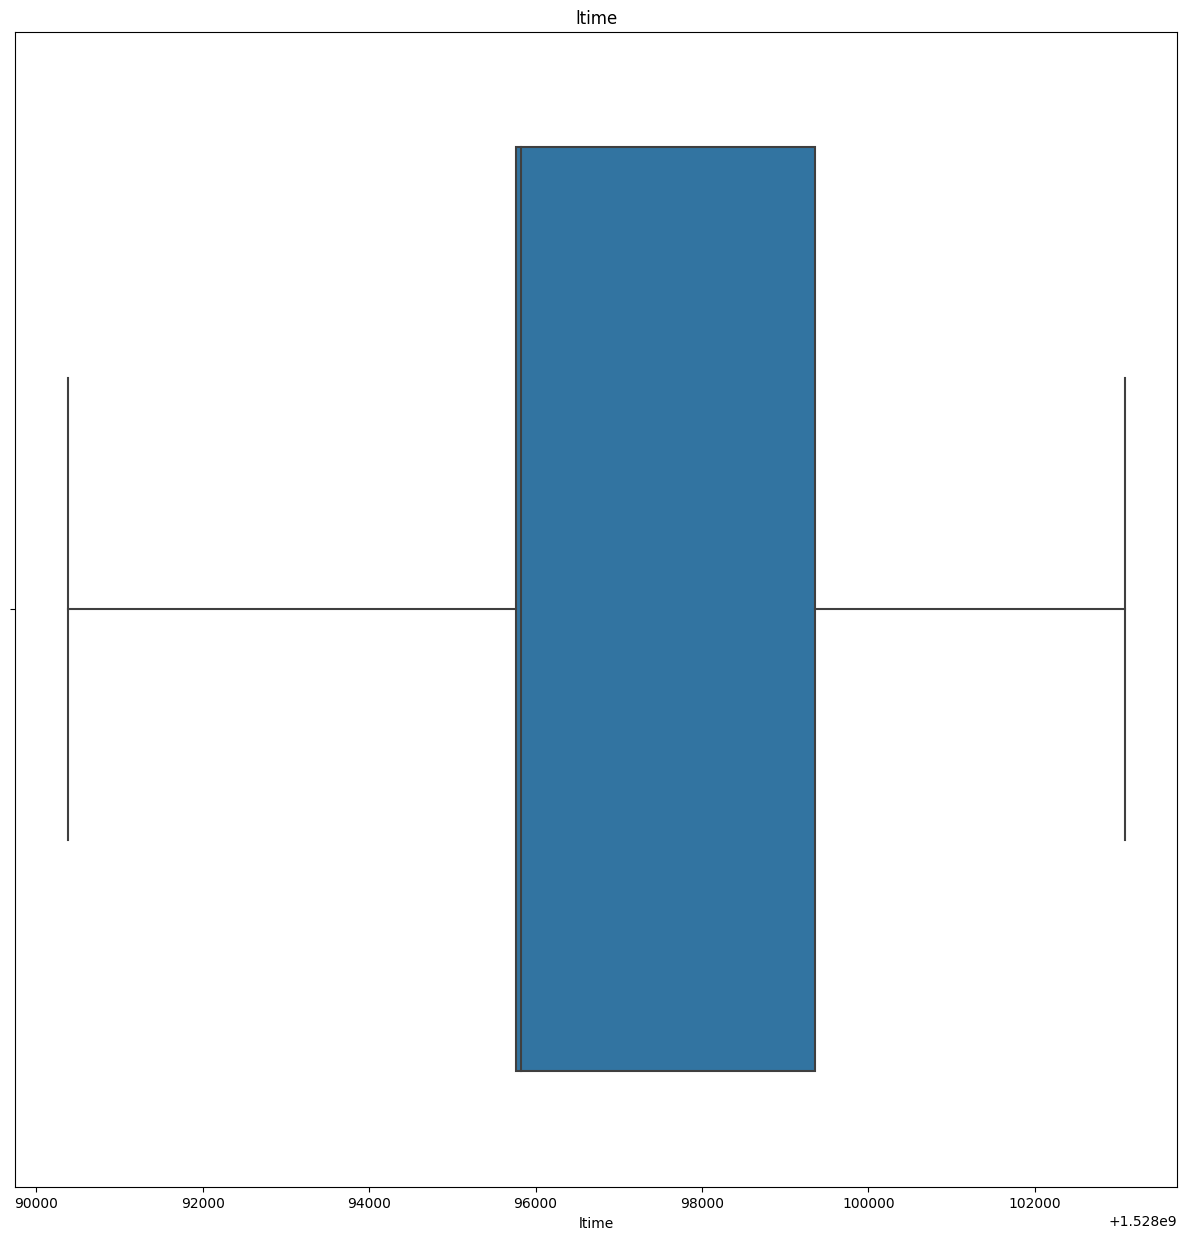

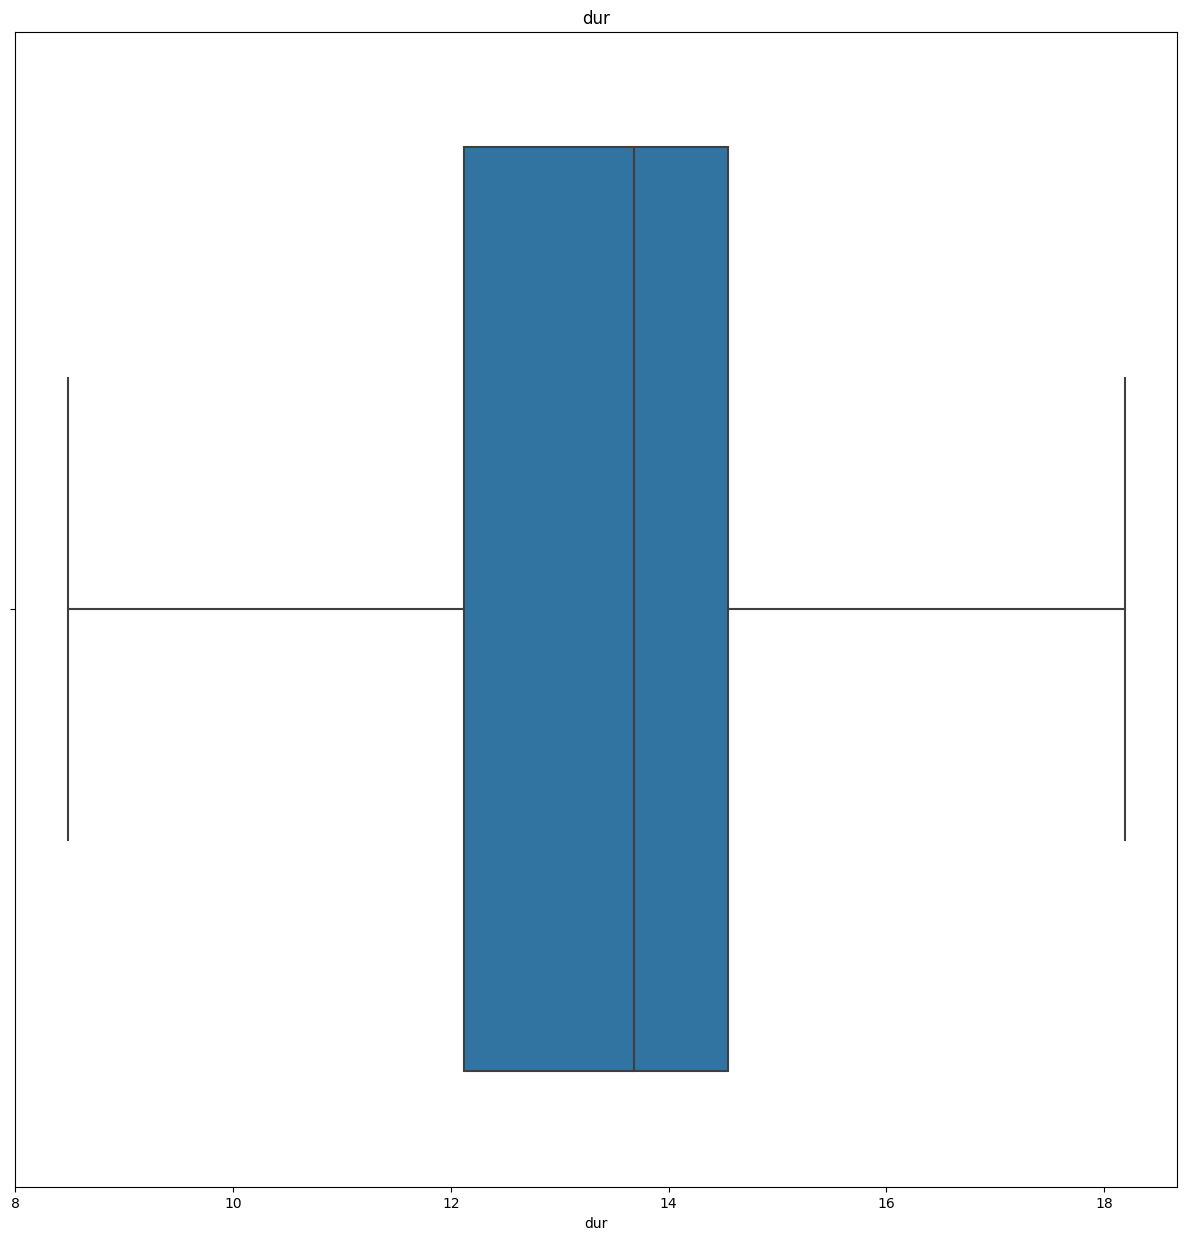

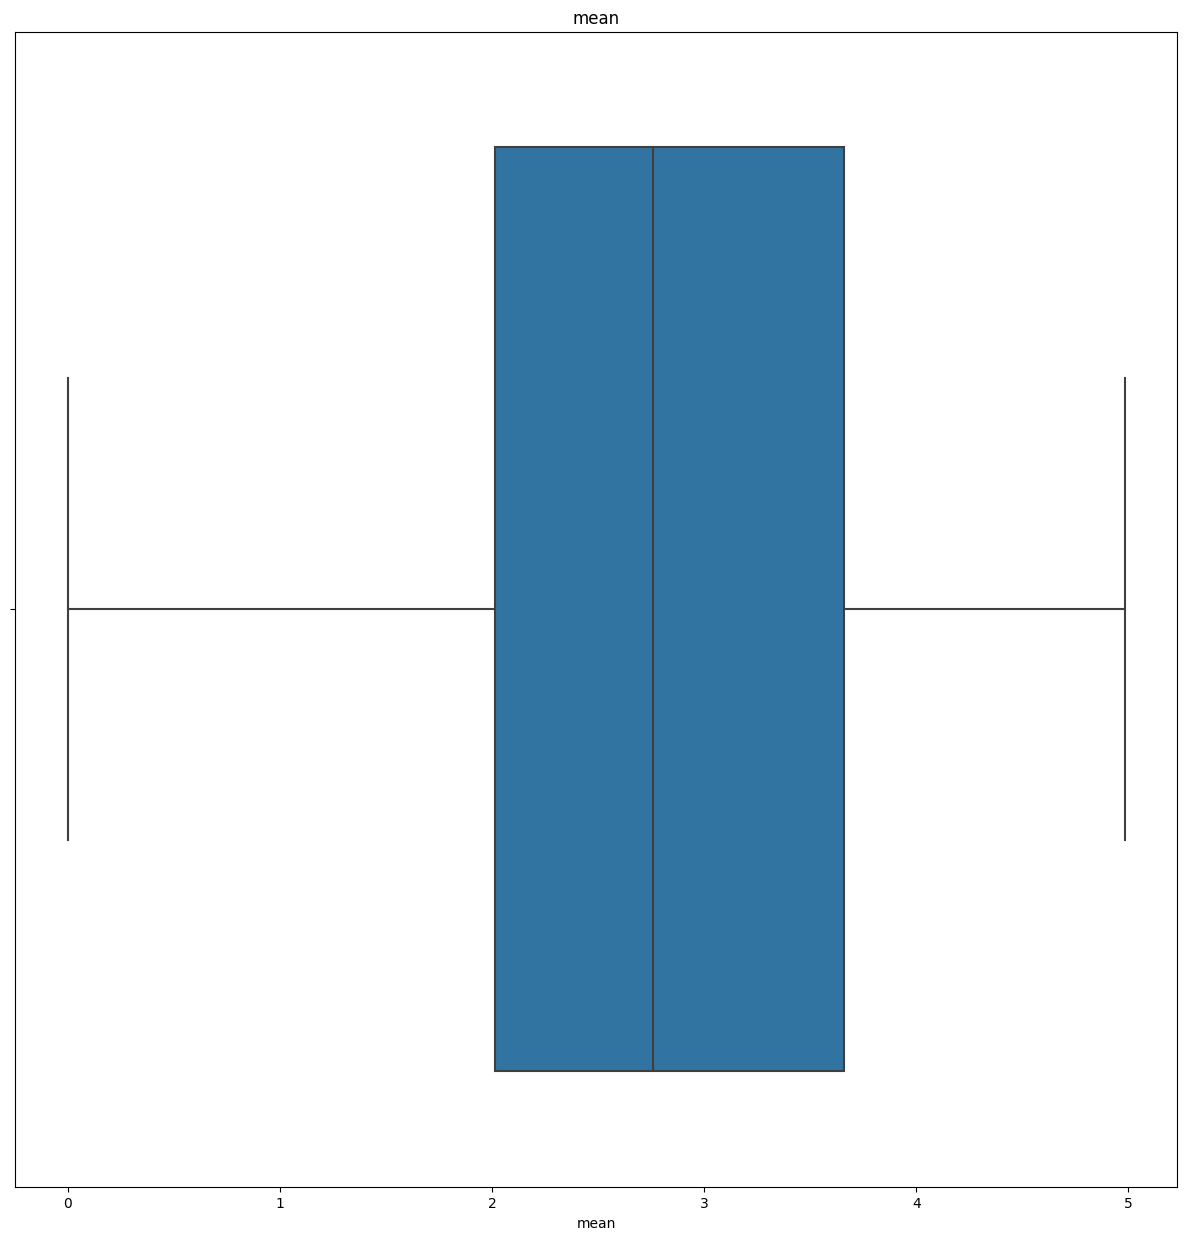

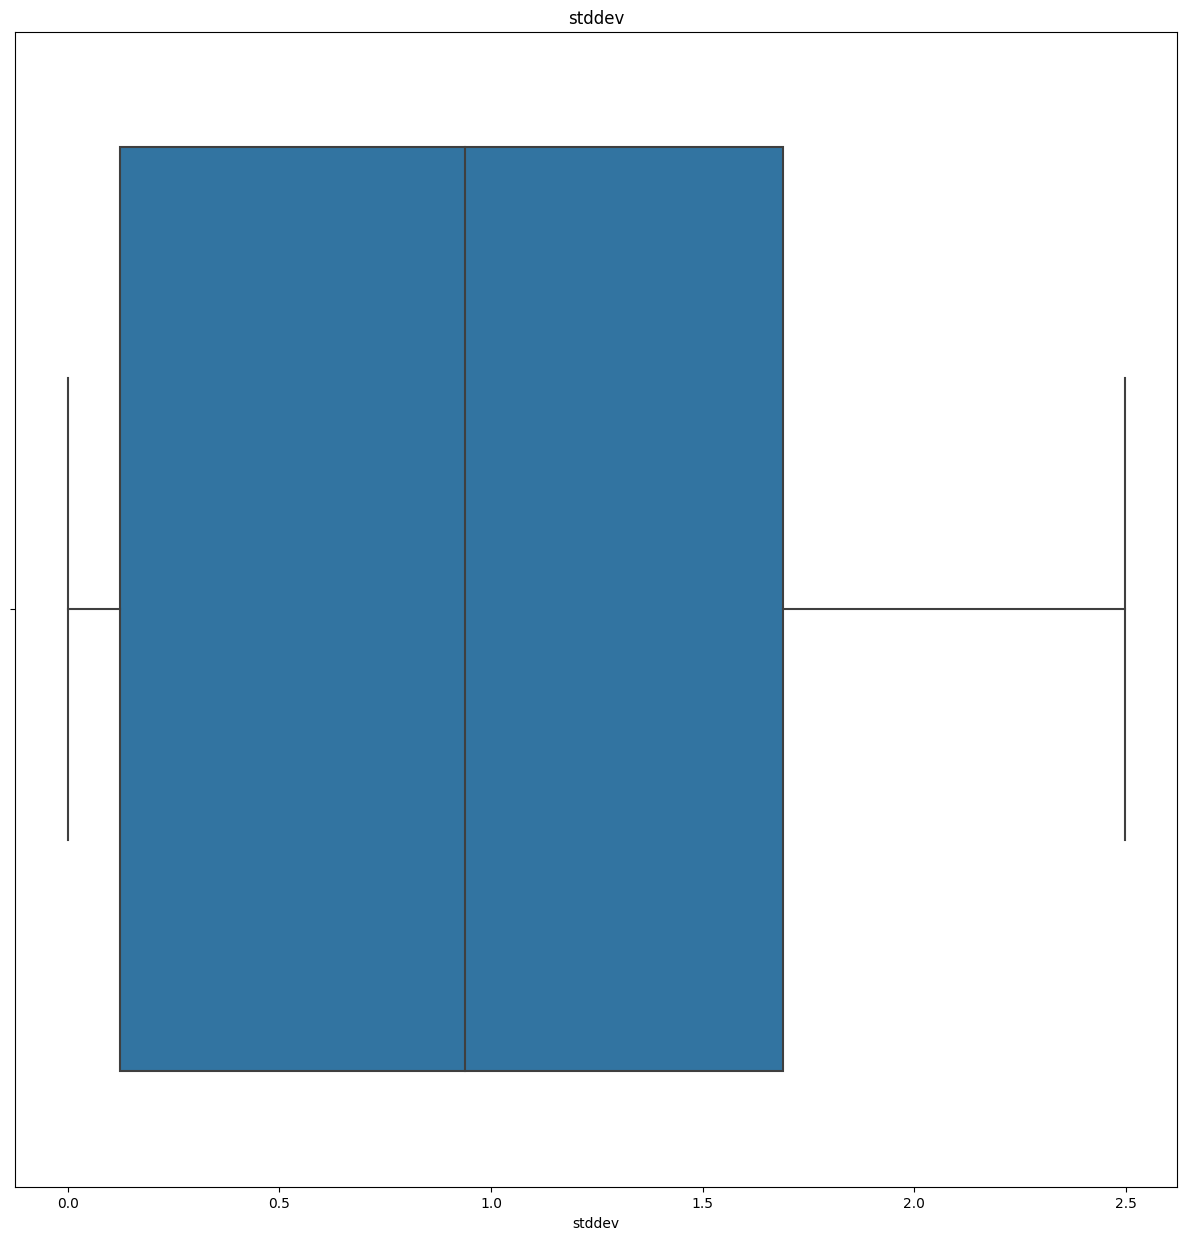

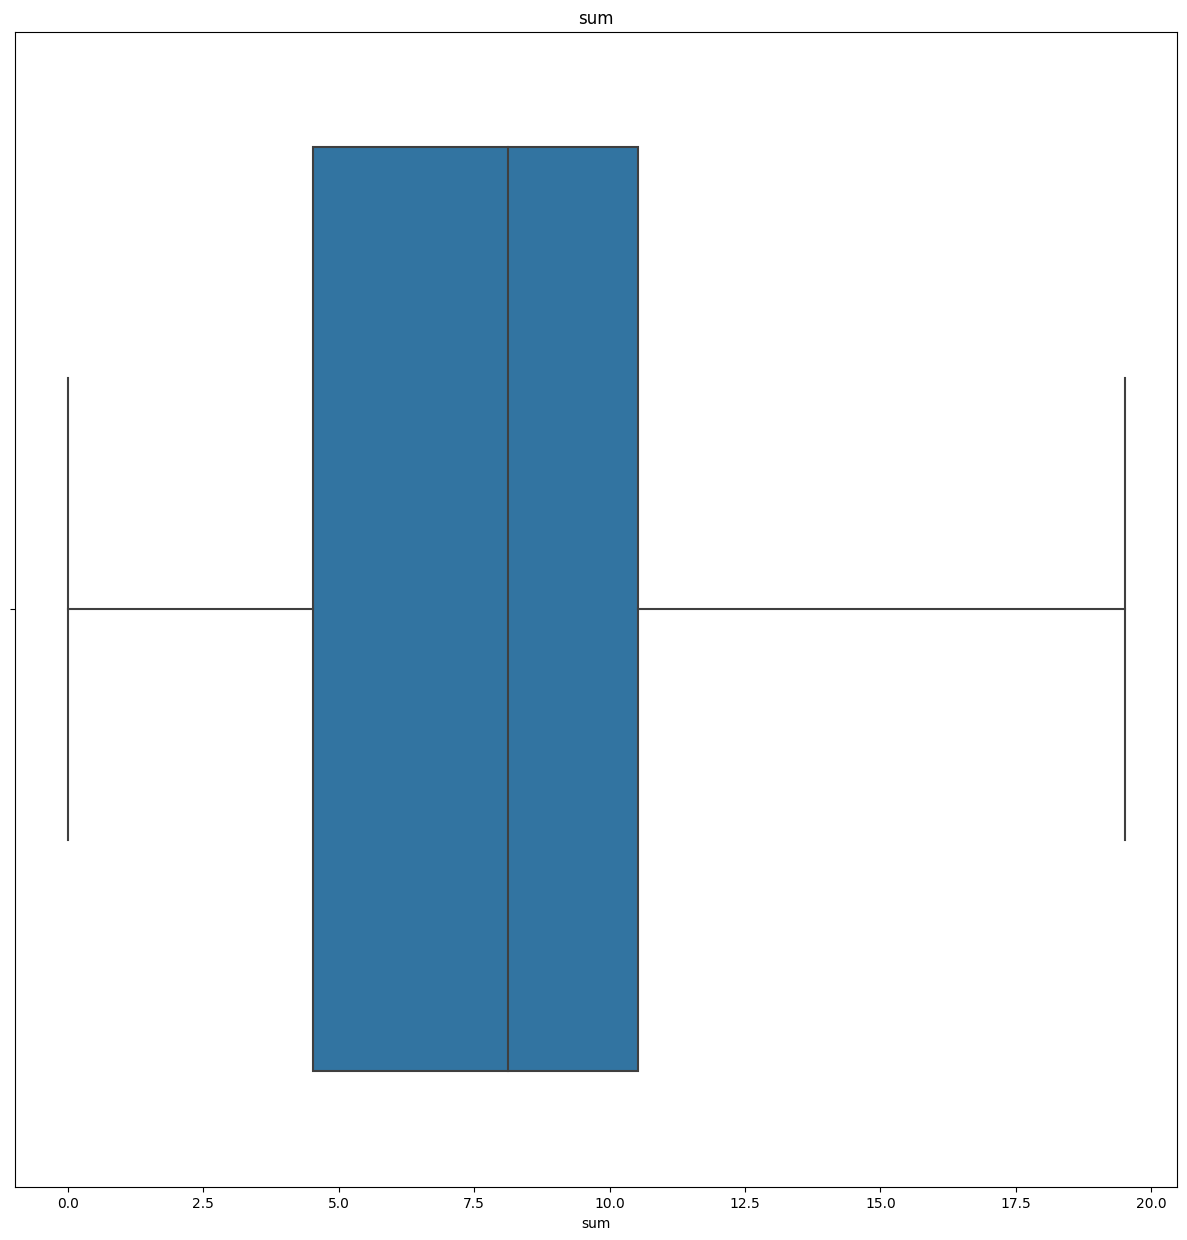

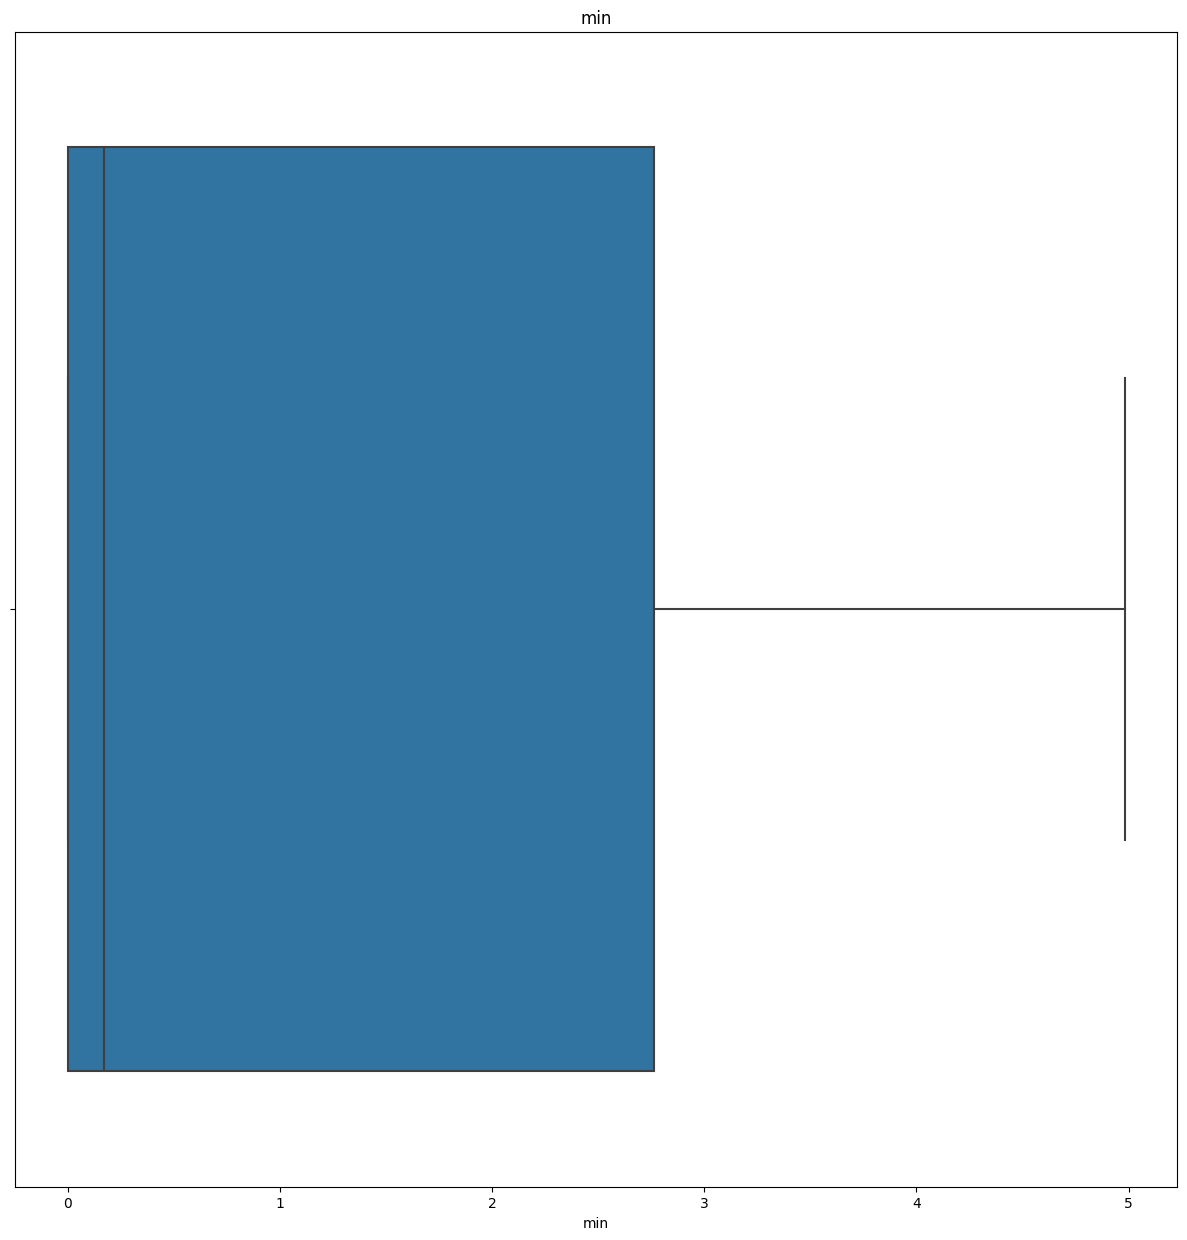

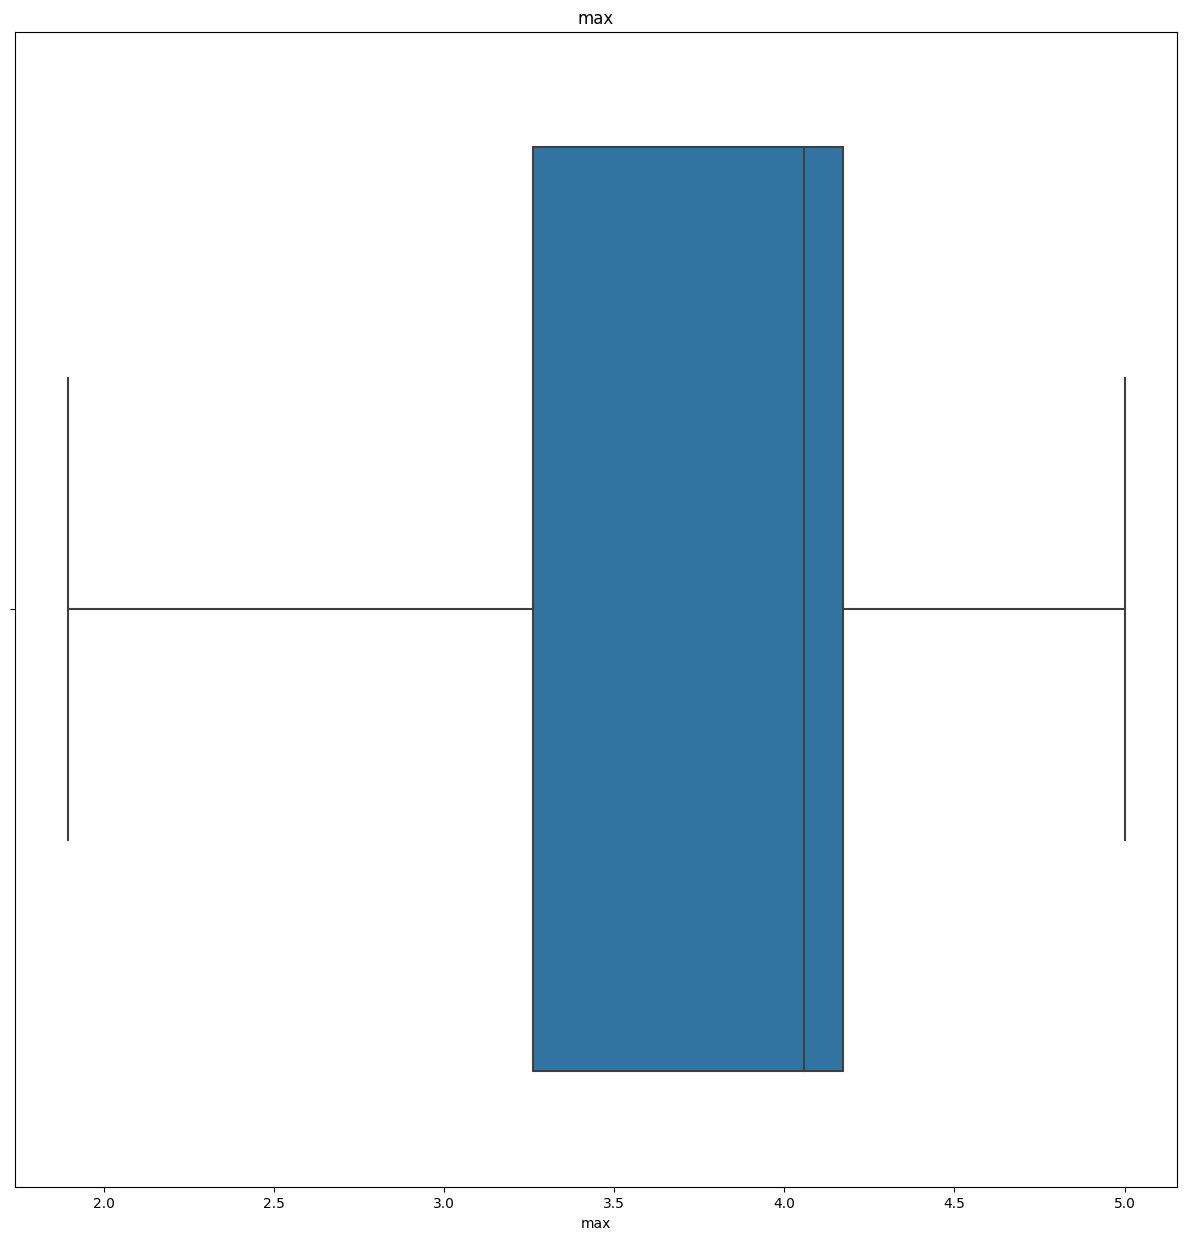

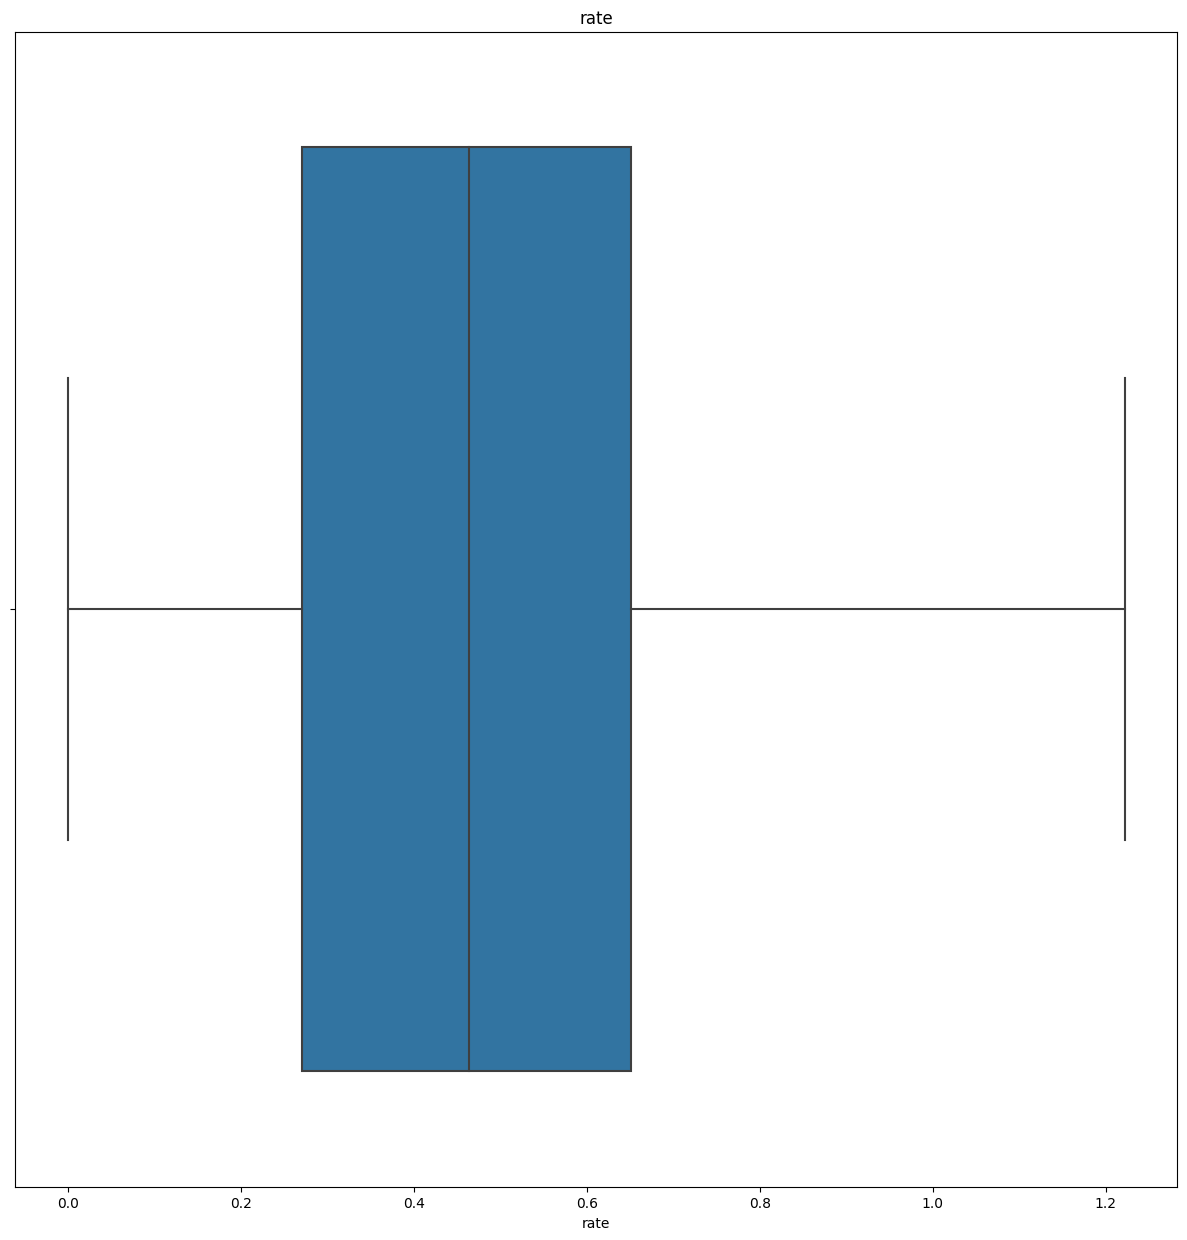

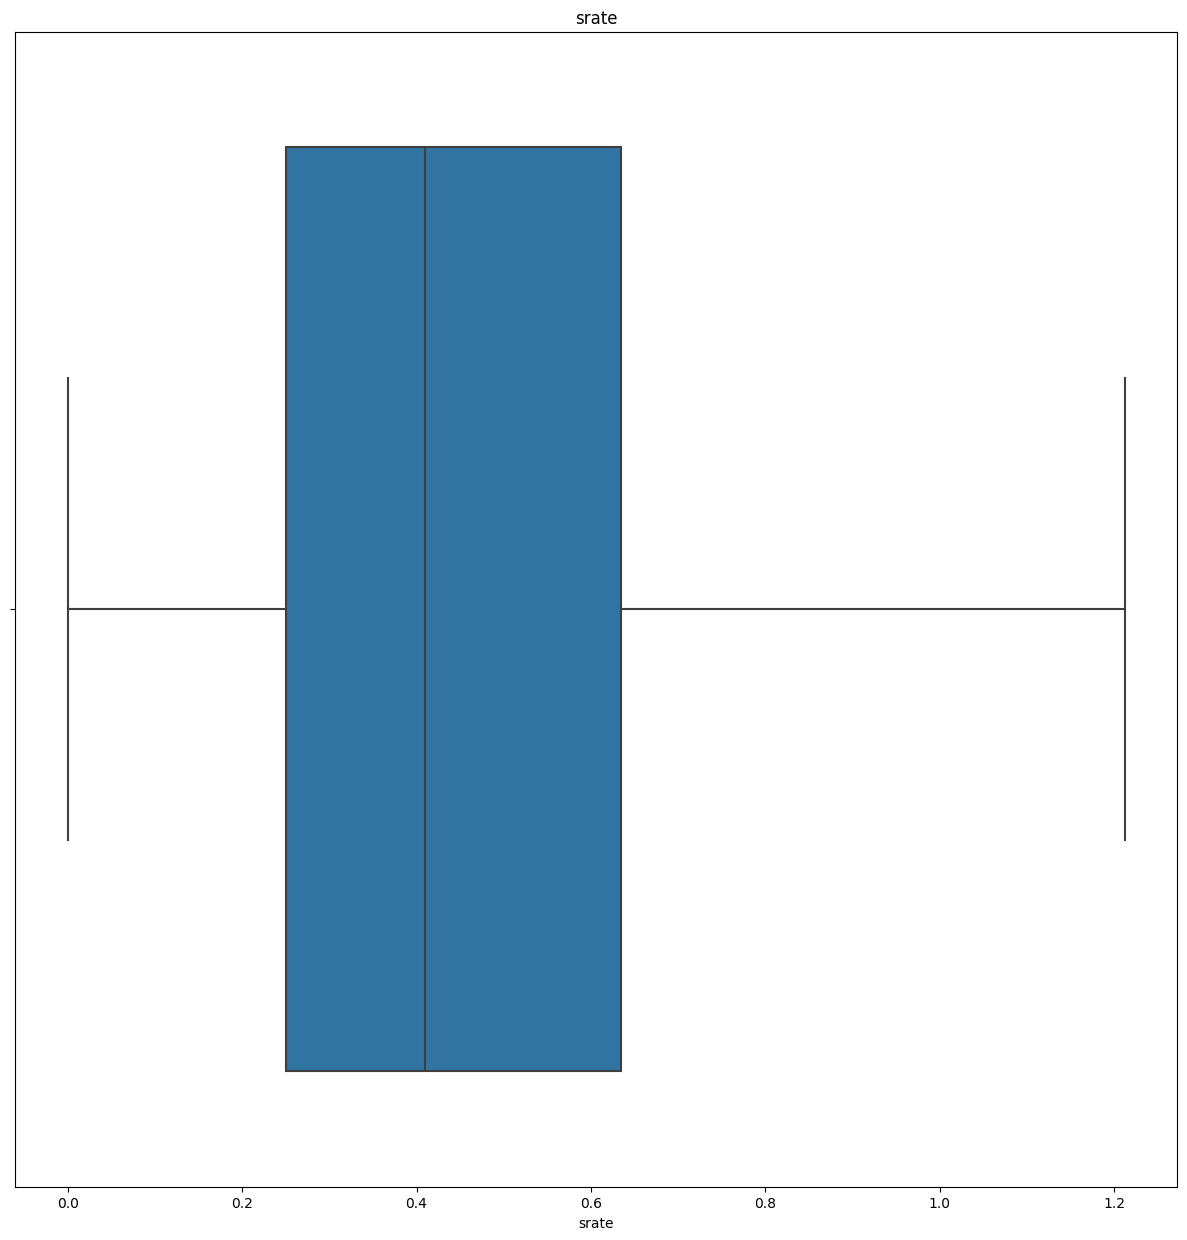

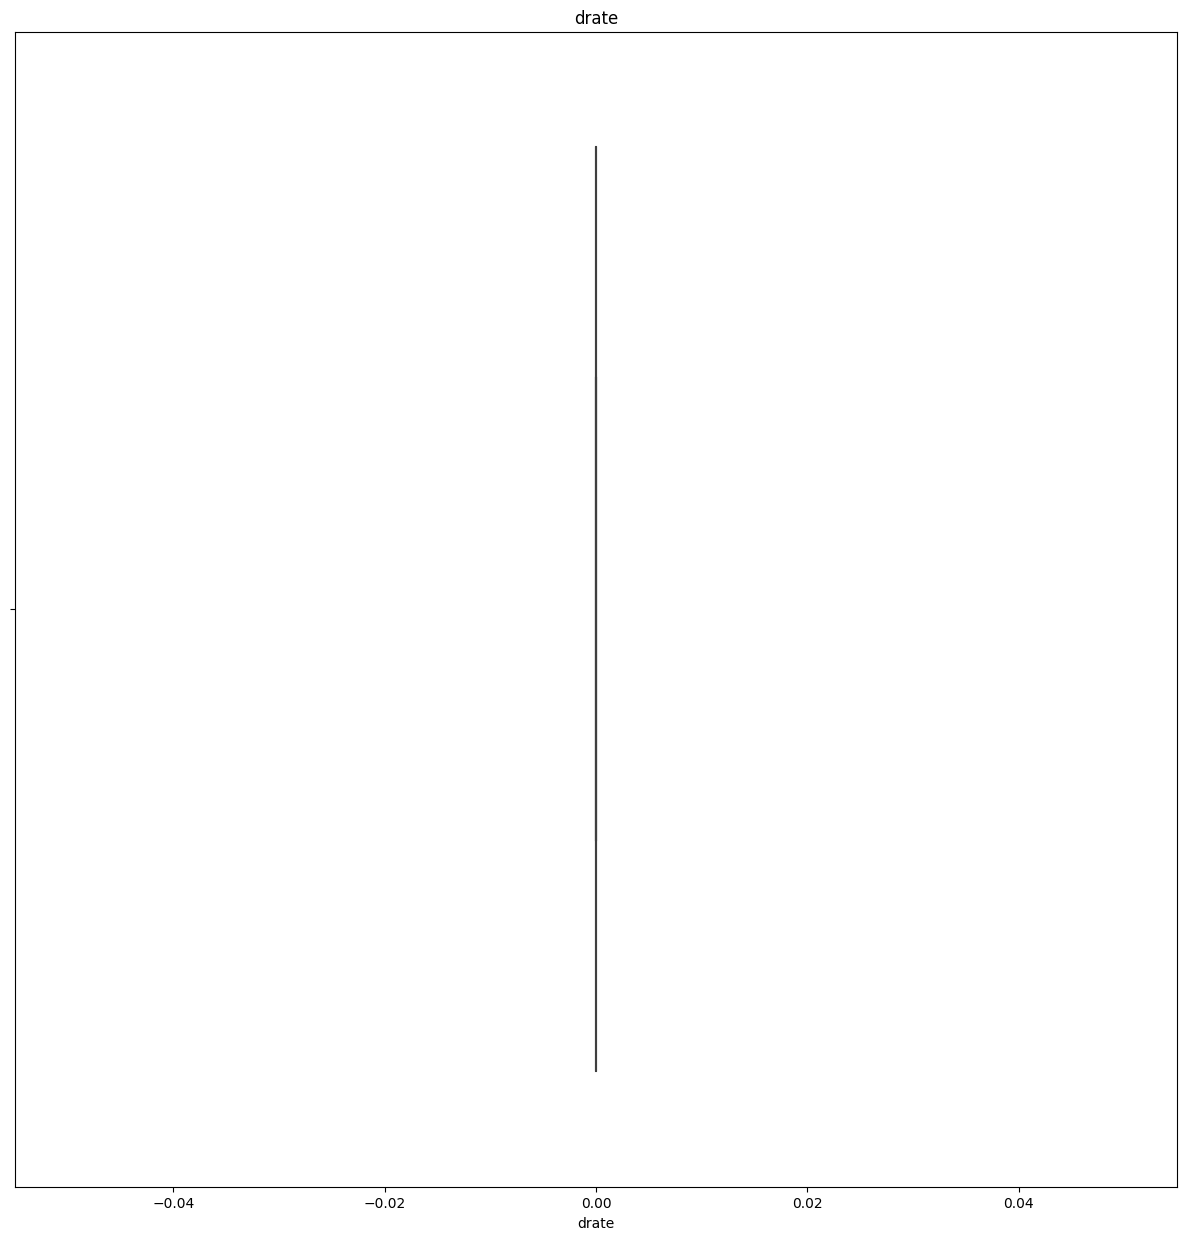

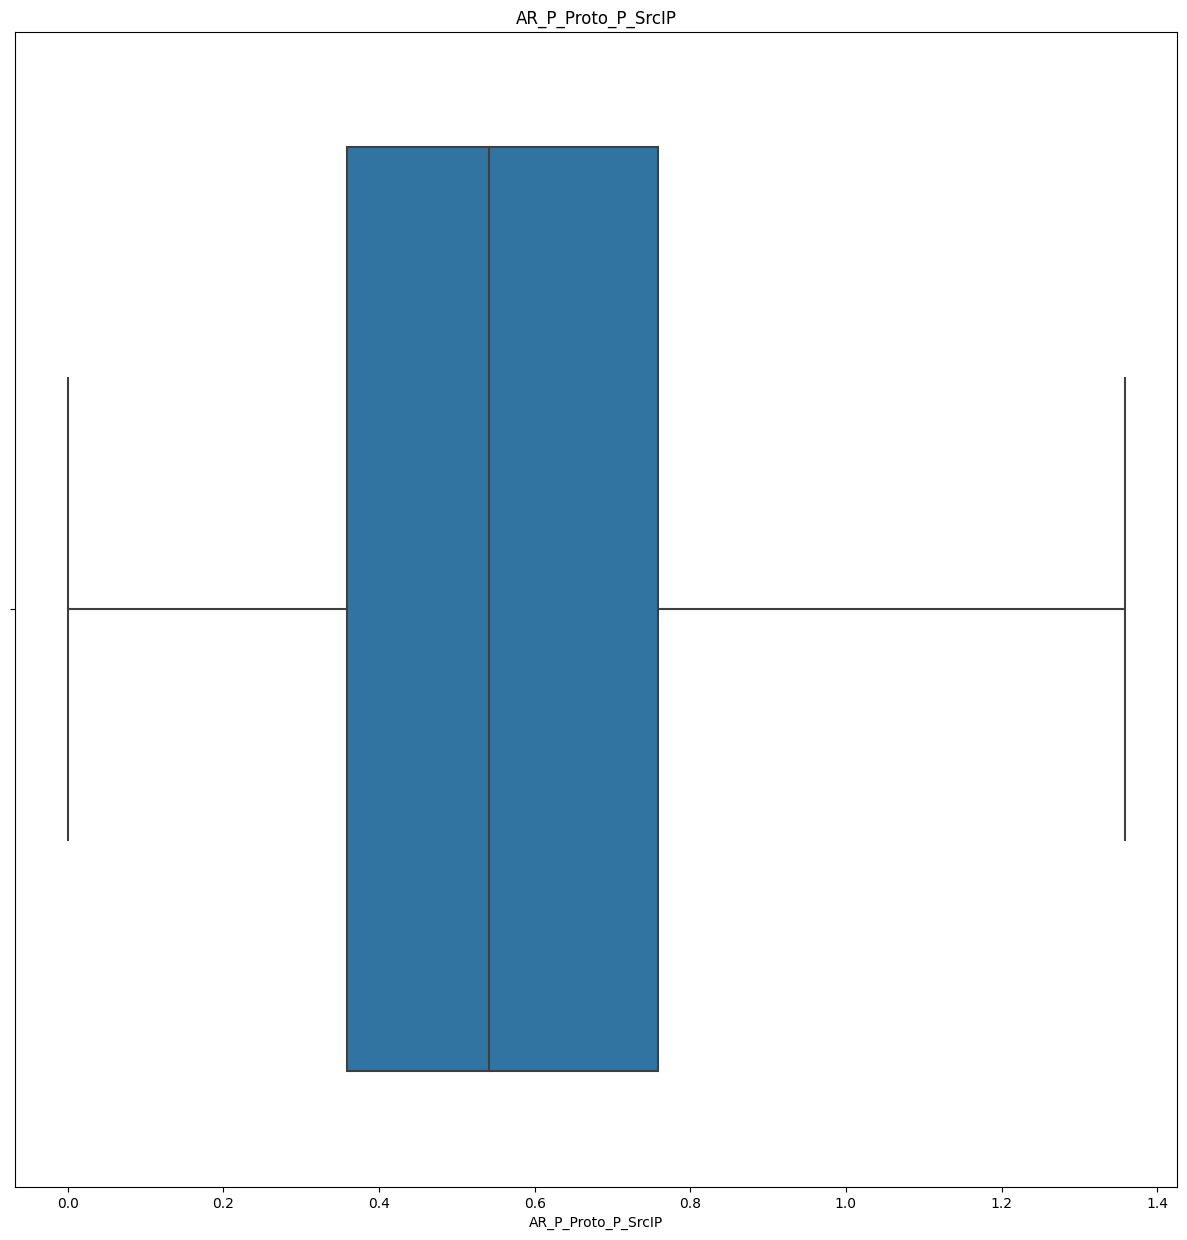

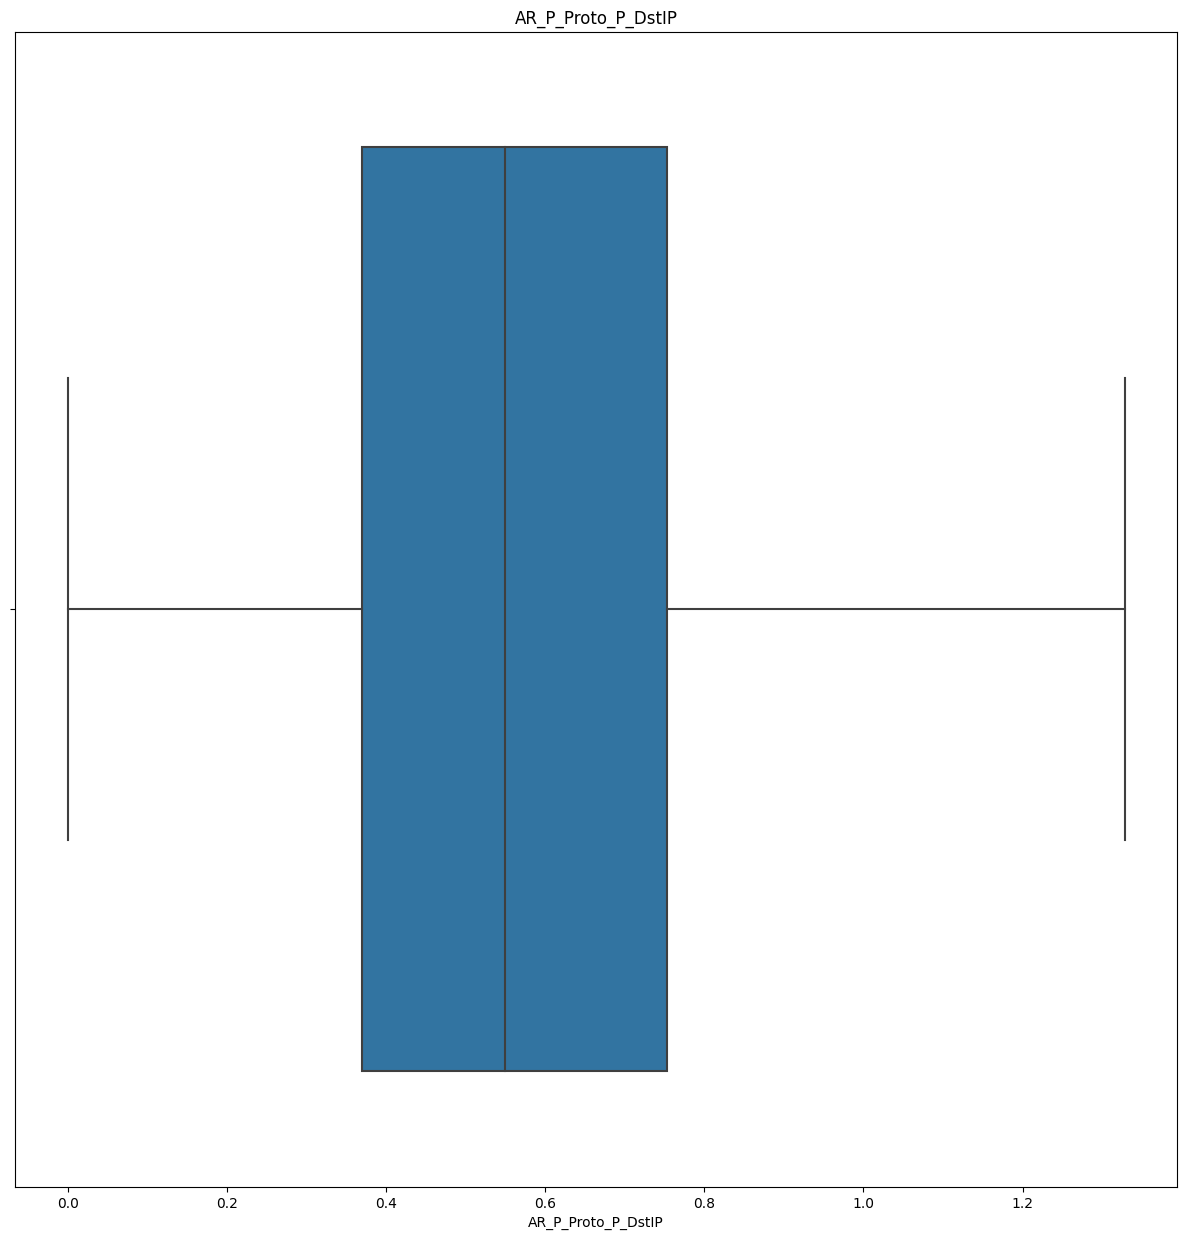

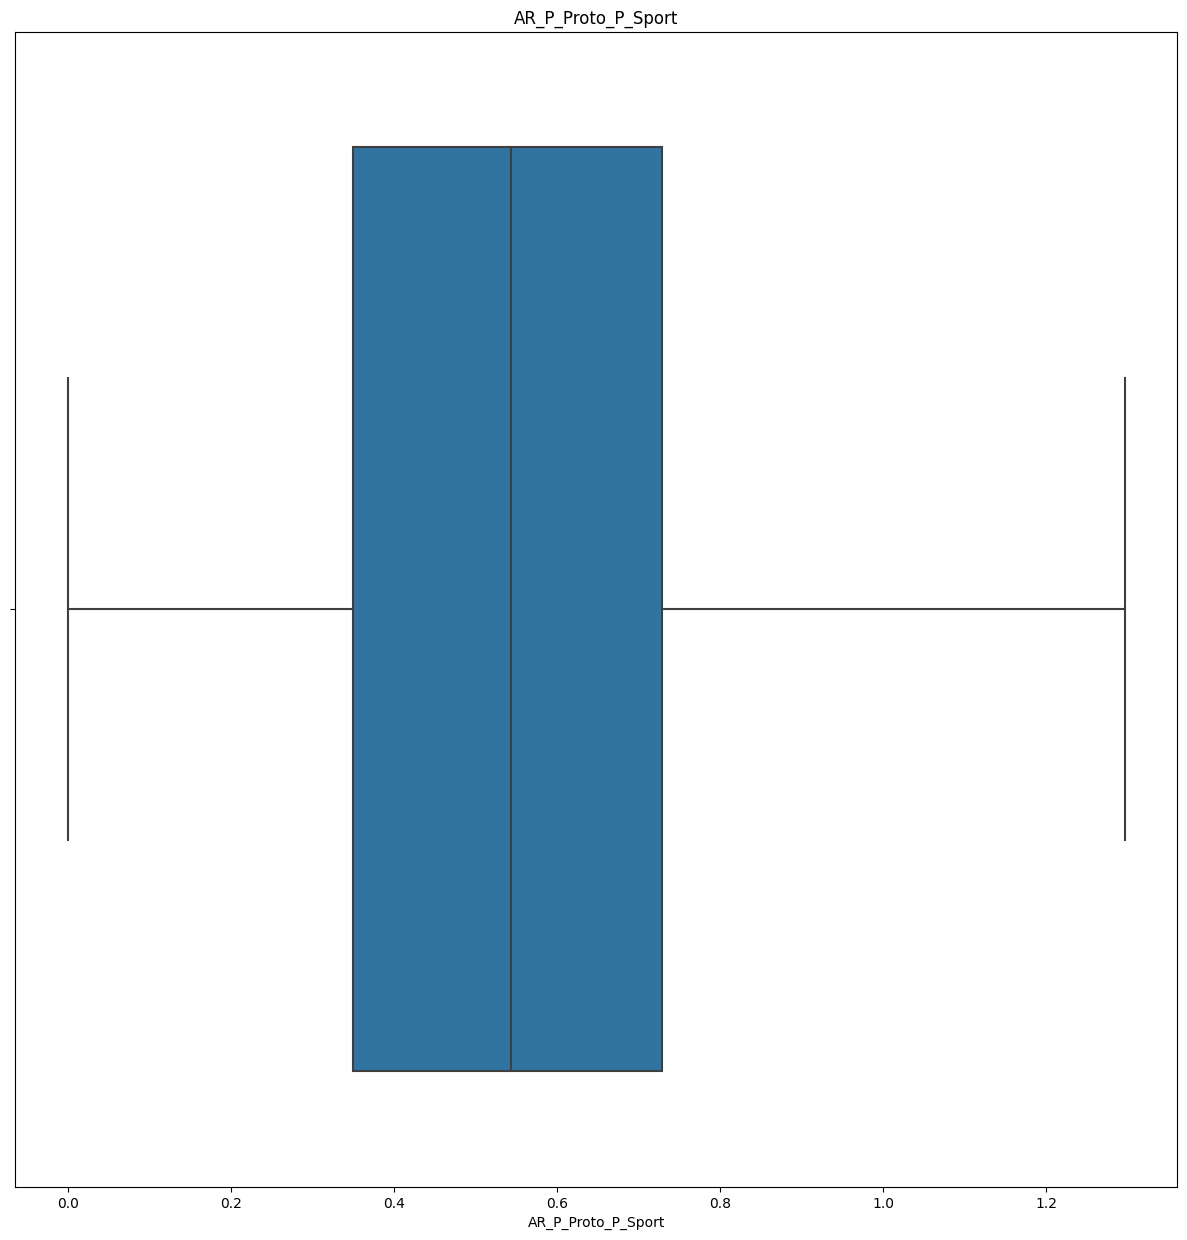

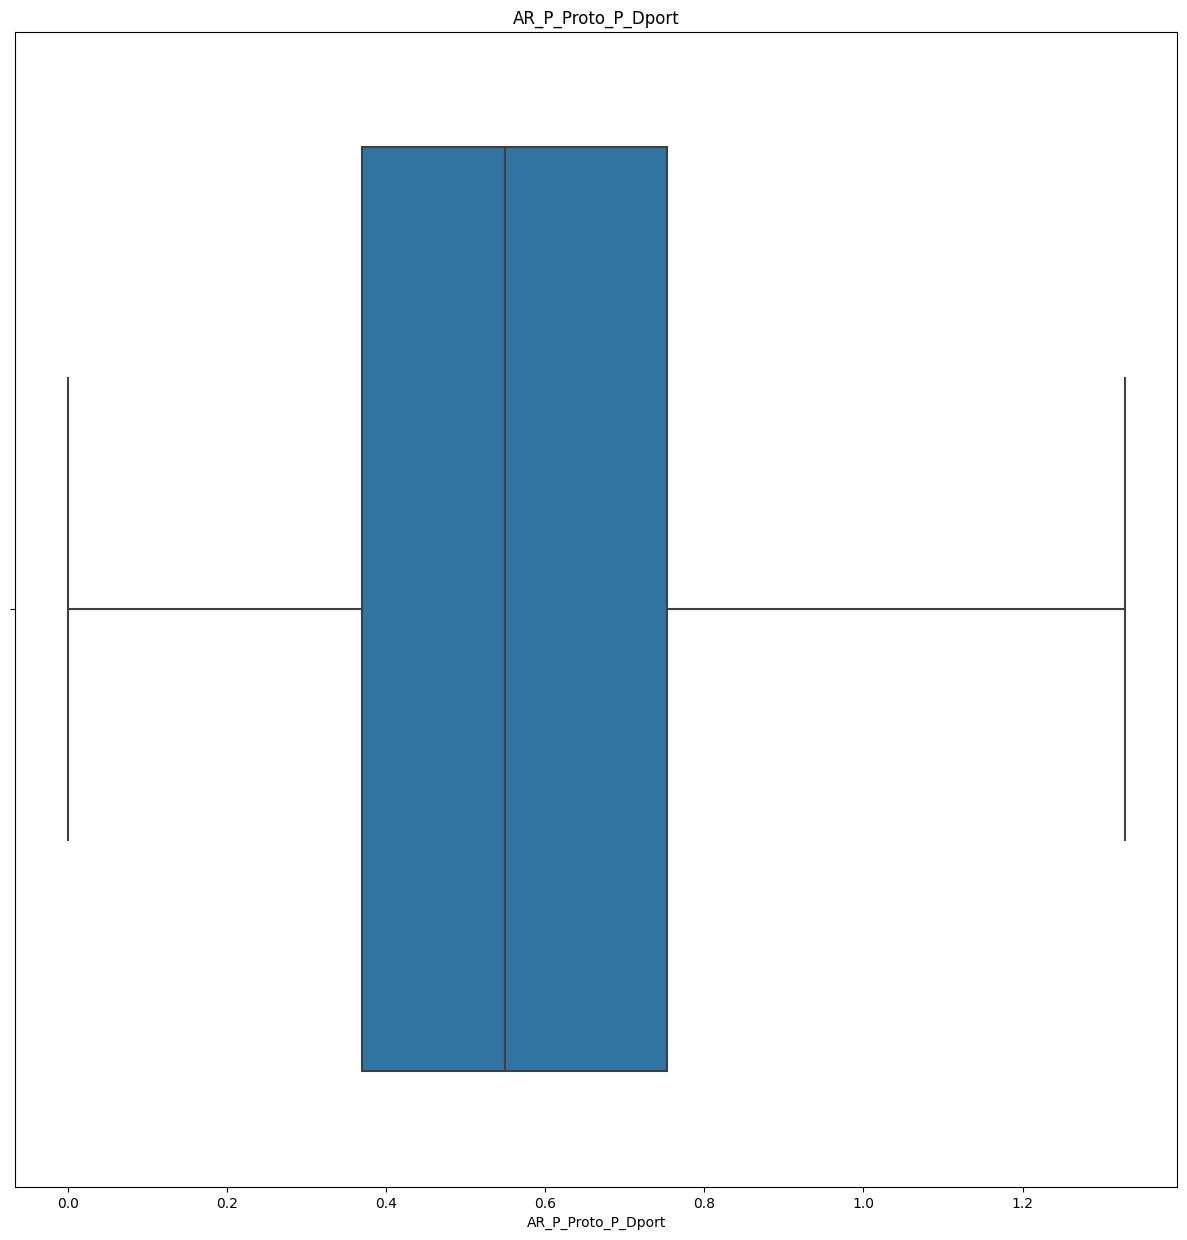

<Figure size 1500x1500 with 0 Axes>

In [12]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

<Axes: xlabel='subcategory'>

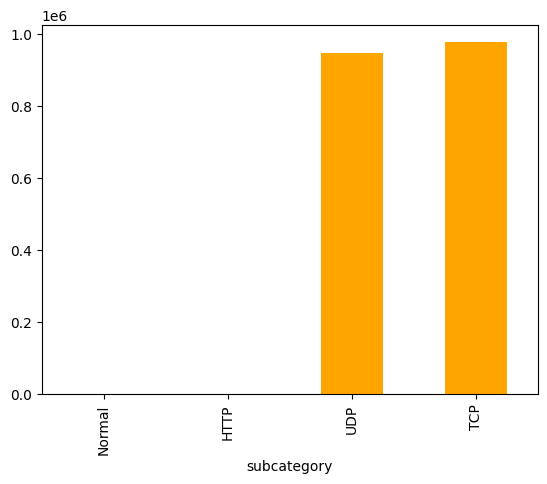

In [13]:
df['subcategory'].value_counts().sort_values().plot(kind = 'bar', color = ['orange'])

In [14]:
# Delete rows containing '0x0303' in 'ColumnName'
df = df[~df['sport'].astype(str).str.contains('0x0303')]


# Delete rows containing '0x0303' in 'ColumnName'
df= df[~df['dport'].astype(str).str.contains('0x5000')]

# Print the resulting DataFrame without the rows containing '0x0303'
df

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1650261,1.528103e+09,e,1,tcp,1,192.168.100.150,54110,192.168.100.3,80,...,1.216620,40,38,1.296196,1.216620,328,308,1,DDoS,HTTP
1,1650262,1.528103e+09,e,1,tcp,1,192.168.100.150,54112,192.168.100.3,80,...,1.216620,40,38,1.296196,1.216620,328,308,1,DDoS,HTTP
2,1650263,1.528103e+09,e,1,tcp,1,192.168.100.150,54114,192.168.100.3,80,...,1.216620,40,38,1.249800,1.216620,328,308,1,DDoS,HTTP
3,1650264,1.528103e+09,e,1,tcp,1,192.168.100.150,54116,192.168.100.3,80,...,1.216620,40,38,1.249860,1.216620,328,308,1,DDoS,HTTP
4,1650265,1.528103e+09,e,1,tcp,1,192.168.100.150,54118,192.168.100.3,80,...,1.216620,40,38,1.249910,1.216620,328,308,1,DDoS,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927096,3577357,1.528090e+09,e,1,udp,3,192.168.100.3,36242,205.251.194.102,53,...,1.328163,2,74,1.296196,1.328152,4,122,0,Normal,Normal
1927097,3577358,1.528090e+09,e,1,udp,3,192.168.100.3,63574,205.251.194.102,53,...,1.328163,2,74,1.296196,1.328152,4,122,0,Normal,Normal
1927098,3577359,1.528090e+09,e,1,udp,3,192.168.100.3,59485,205.251.194.154,53,...,1.328163,1,74,1.296196,1.328152,2,122,0,Normal,Normal
1927099,3577360,1.528090e+09,e,1,udp,3,192.168.100.3,20844,192.31.80.30,53,...,1.328163,2,74,1.296196,1.328152,4,122,0,Normal,Normal


In [15]:
#label encoding
# 'saddr', 'sport', 'daddr', 'dport',
cf=['flgs','proto', 'saddr', 'daddr','state','category','subcategory']
label_encoder = LabelEncoder()

for col in cf:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

In [16]:
df

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1650261,1.528103e+09,0,1,2,1,4,54110,16,80,...,1.216620,40,38,1.296196,1.216620,328,308,1,0,0
1,1650262,1.528103e+09,0,1,2,1,4,54112,16,80,...,1.216620,40,38,1.296196,1.216620,328,308,1,0,0
2,1650263,1.528103e+09,0,1,2,1,4,54114,16,80,...,1.216620,40,38,1.249800,1.216620,328,308,1,0,0
3,1650264,1.528103e+09,0,1,2,1,4,54116,16,80,...,1.216620,40,38,1.249860,1.216620,328,308,1,0,0
4,1650265,1.528103e+09,0,1,2,1,4,54118,16,80,...,1.216620,40,38,1.249910,1.216620,328,308,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927096,3577357,1.528090e+09,0,1,3,3,6,36242,46,53,...,1.328163,2,74,1.296196,1.328152,4,122,0,1,1
1927097,3577358,1.528090e+09,0,1,3,3,6,63574,46,53,...,1.328163,2,74,1.296196,1.328152,4,122,0,1,1
1927098,3577359,1.528090e+09,0,1,3,3,6,59485,47,53,...,1.328163,1,74,1.296196,1.328152,2,122,0,1,1
1927099,3577360,1.528090e+09,0,1,3,3,6,20844,24,53,...,1.328163,2,74,1.296196,1.328152,4,122,0,1,1


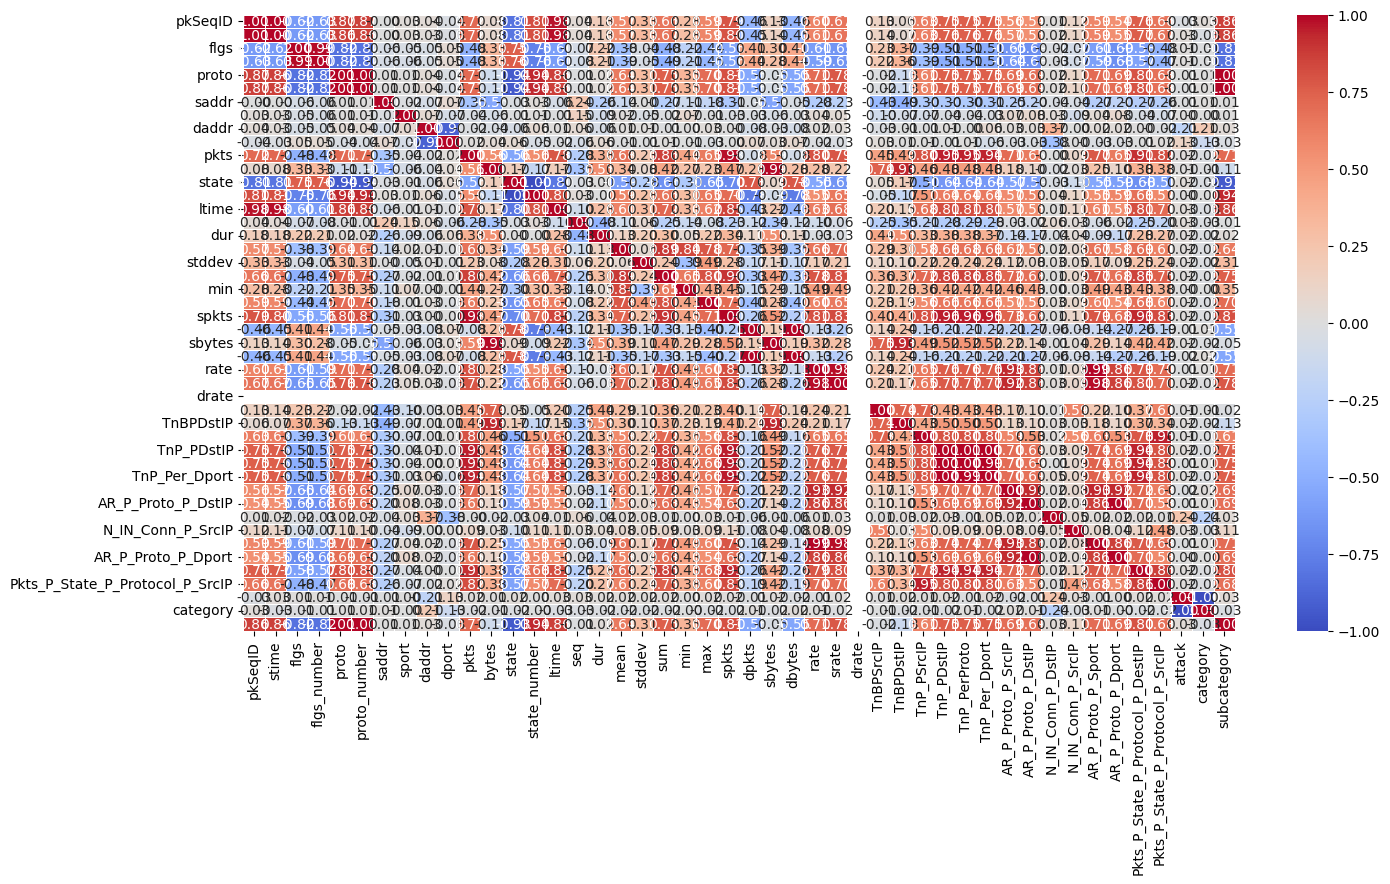

In [17]:
corr_matrix = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [18]:
X = df.drop(["subcategory"], axis=1)
y = df["subcategory"]
X

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category
0,1650261,1.528103e+09,0,1,2,1,4,54110,16,80,...,1.268890,1.216620,40,38,1.296196,1.216620,328,308,1,0
1,1650262,1.528103e+09,0,1,2,1,4,54112,16,80,...,1.268890,1.216620,40,38,1.296196,1.216620,328,308,1,0
2,1650263,1.528103e+09,0,1,2,1,4,54114,16,80,...,1.268890,1.216620,40,38,1.249800,1.216620,328,308,1,0
3,1650264,1.528103e+09,0,1,2,1,4,54116,16,80,...,1.268890,1.216620,40,38,1.249860,1.216620,328,308,1,0
4,1650265,1.528103e+09,0,1,2,1,4,54118,16,80,...,1.268890,1.216620,40,38,1.249910,1.216620,328,308,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927096,3577357,1.528090e+09,0,1,3,3,6,36242,46,53,...,1.358004,1.328163,2,74,1.296196,1.328152,4,122,0,1
1927097,3577358,1.528090e+09,0,1,3,3,6,63574,46,53,...,1.358004,1.328163,2,74,1.296196,1.328152,4,122,0,1
1927098,3577359,1.528090e+09,0,1,3,3,6,59485,47,53,...,1.358004,1.328163,1,74,1.296196,1.328152,2,122,0,1
1927099,3577360,1.528090e+09,0,1,3,3,6,20844,24,53,...,1.358004,1.328163,2,74,1.296196,1.328152,4,122,0,1


In [19]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1927096    1
1927097    1
1927098    1
1927099    1
1927100    1
Name: subcategory, Length: 1927085, dtype: int32

In [21]:
'''# Step 2: Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)'''

'# Step 2: Apply SMOTE for oversampling\nsmote = SMOTE(random_state=42)\nX_resampled, y_resampled = smote.fit_resample(X, y)'

In [23]:
# Step 3: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y , test_size=0.2, random_state=42)

In [26]:
# Step 5: Apply PCA for dimensionality reduction
n_components = 3  # Specify the number of components for PCA
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)